# Explorin Assylum Seeking data

Data found in The UN Refugee Agency [https://popstats.unhcr.org/refugee-statistics/download/]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

## Moving in South Sudan

In [3]:
moving_in = pd.read_csv("data/moving_in.csv", on_bad_lines='skip')

# Removing Internal Displacements
moving_in = moving_in.drop(moving_in[moving_in["Country of origin (ISO)"] == "SSD"].index)

# Dropping redundant columns
moving_in = moving_in.drop(["Country of asylum (ISO)", "Country of asylum", "IDPs of concern to UNHCR", "Host Community", "Other people in need of international protection"], axis=1)

In [4]:
# Adding sum of all refugee like population
moving_in["Total"] = moving_in[["Refugees under UNHCR\'s mandate", "Asylum-seekers", "Stateless persons", "Others of concern"]].sum(axis=1)


In [5]:
moving_in.head()

Year       Country of origin Country of origin (ISO)  \
0  2011    Central African Rep.                     CAF   
1  2011  Dem. Rep. of the Congo                     COD   
2  2011                Ethiopia                     ETH   
4  2011                   Sudan                     SDN   
5  2012    Central African Rep.                     CAF   

   Refugees under UNHCR's mandate  Asylum-seekers  Stateless persons  \
0                            1025               0                  0   
1                           22186               0                  0   
2                            4967              85                  0   
4                           76845               5                  0   
5                            1560               5                  0   

   Others of concern  Total  
0                  0   1025  
1                  0  22186  
2                  0   5052  
4                  0  76850  
5                  0   1565

### Most common countries to take refuge in South Sudan

In [6]:
moving_in["Country of origin"].value_counts()

Country of origin
Central African Rep.      12
Dem. Rep. of the Congo    12
Ethiopia                  12
Sudan                     12
Eritrea                   11
Somalia                    9
Burundi                    8
Cameroon                   4
Stateless                  3
Rwanda                     2
Congo                      1
Kenya                      1
Syrian Arab Rep.           1
Uganda                     1
Name: count, dtype: int64

### Visualisations

Added a linear regression trend line to the chart but idk if this comes off as redundant since the trend is pretty obvious

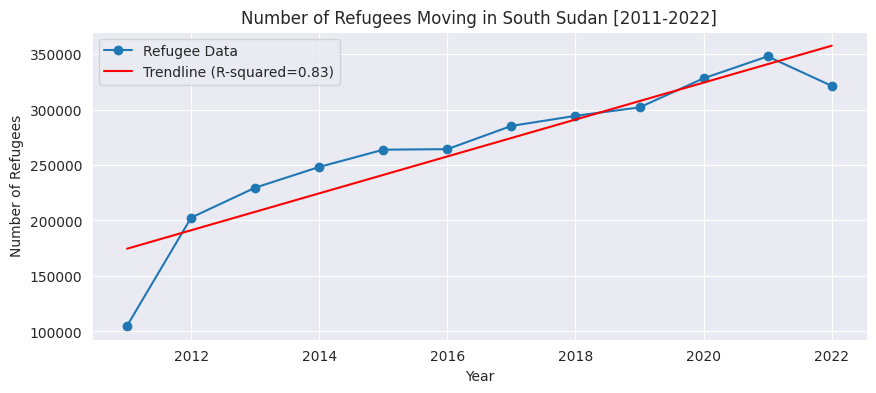

In [17]:
# Group and sum the data by year
df_grouped = moving_in.groupby('Year')[['Refugees under UNHCR\'s mandate', 'Asylum-seekers', 'Stateless persons', 'Others of concern', 'Total']].sum().reset_index()

# Creating a line chart
plt.figure(figsize=(10, 4))
plt.plot(df_grouped['Year'], df_grouped['Total'], marker='o', linestyle='-', label='Refugee Data')
plt.title('Number of Refugees Moving in South Sudan [2011-2022]')
plt.xlabel('Year')
plt.ylabel('Number of Refugees')
plt.grid(True)

# Fitting a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(df_grouped['Year'], df_grouped['Total'])

# Create a trendline using the regression model
trendline = intercept + slope * df_grouped['Year']

# Add the trendline to the chart as a red line
plt.plot(df_grouped['Year'], trendline, 'r', label=f'Trendline (R-squared={r_value**2:.2f})')

# Add a legend to the chart
plt.legend()

# Show the plot
plt.show()

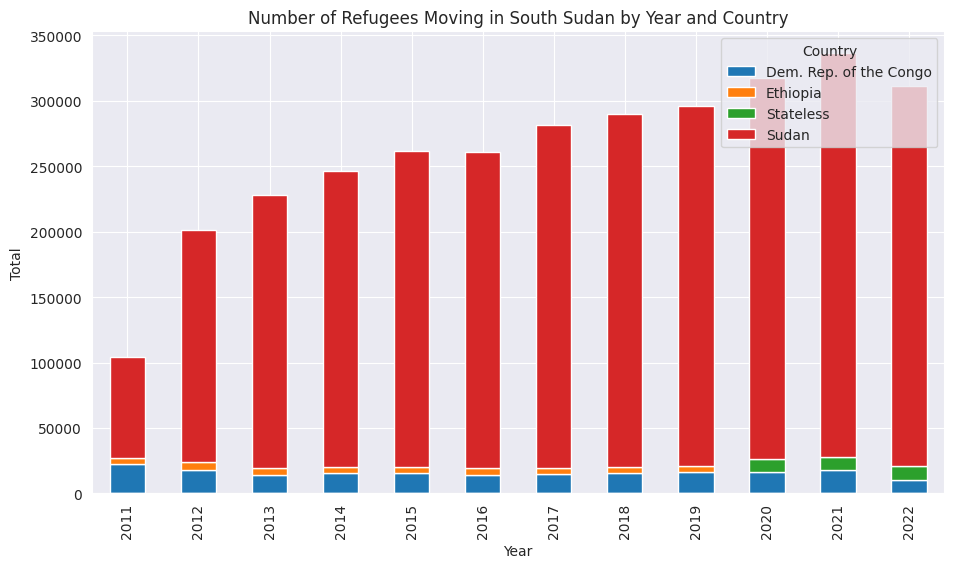

In [7]:
# Group and rank countries by year
moving_in['Rank'] = moving_in.groupby('Year')['Total'].rank(ascending=False)

# Filter for the top 3 countries
df_top3 = moving_in[moving_in['Rank'] <= 3]

# Pivot the data to create separate columns for each country
pivot_df = df_top3.pivot(index='Year', columns='Country of origin', values='Total')

# Create the bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(11, 6))
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Number of Refugees Moving in South Sudan by Year and Country')
plt.legend(title='Country', loc='upper right')
plt.show()

In [8]:
df_grouped.head()

Year  Refugees under UNHCR's mandate  Asylum-seekers  Stateless persons  \
0  2011                          105023              90                  0   
1  2012                          202581              32                  0   
2  2013                          229587              36                  0   
3  2014                          248152             128                  0   
4  2015                          263012             835                  0   

   Others of concern   Total  
0                  0  105113  
1                  0  202613  
2                  0  229623  
3                  0  248280  
4                  0  263847

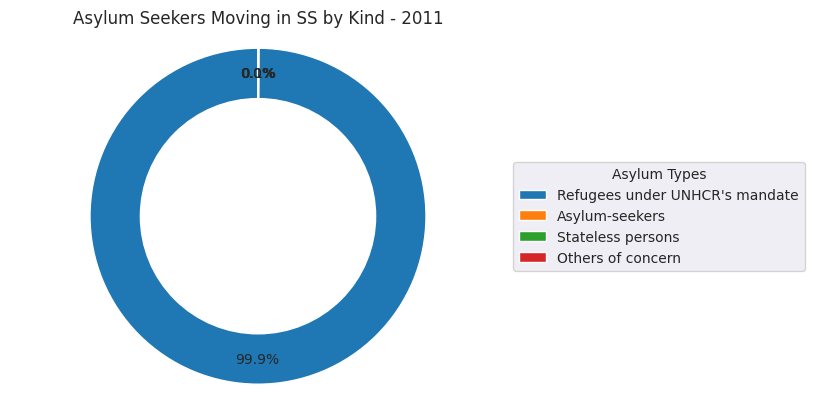

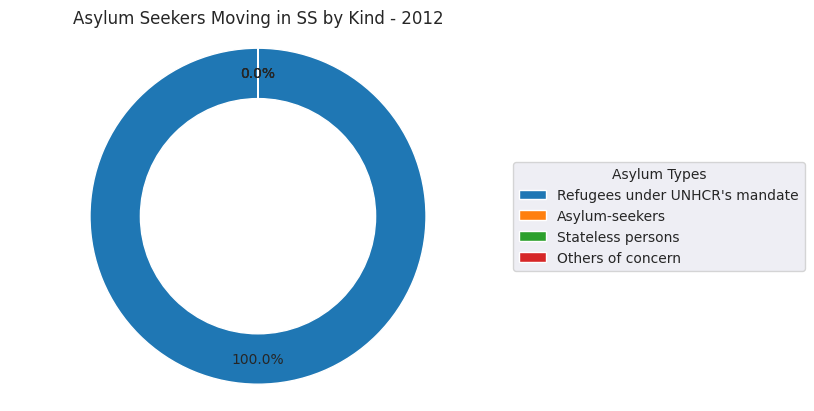

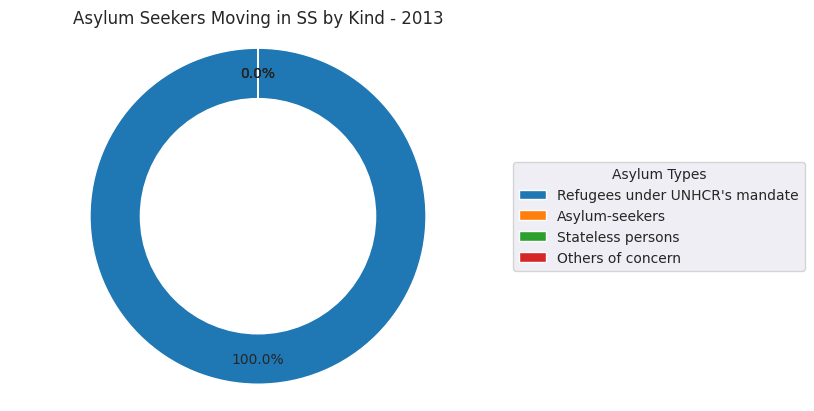

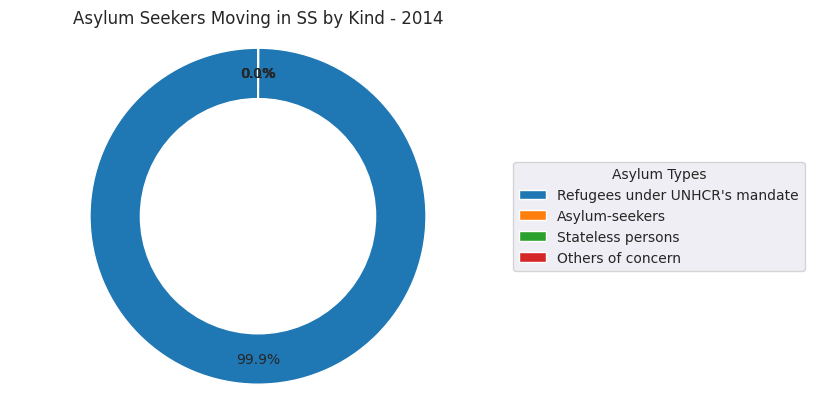

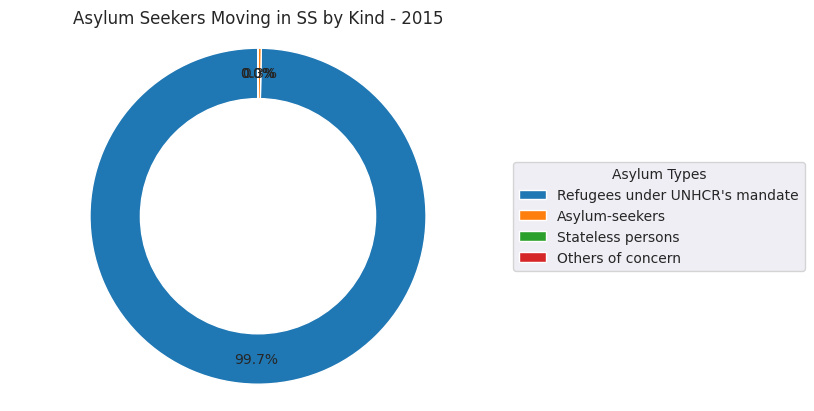

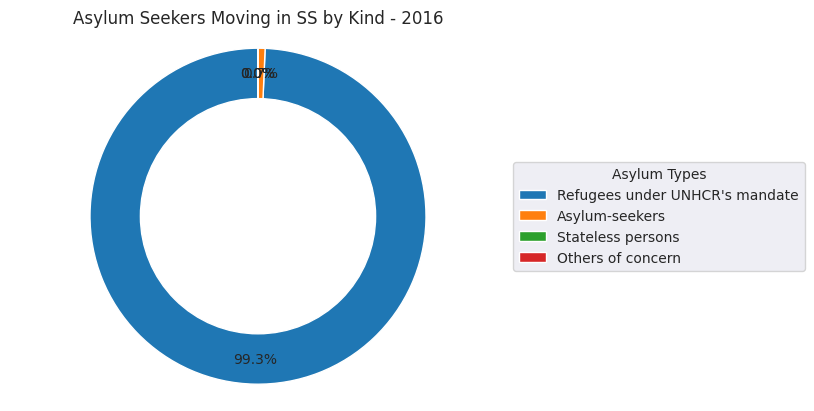

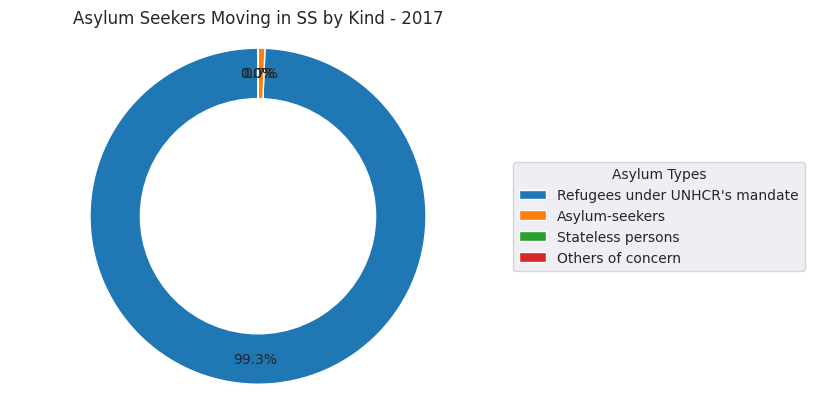

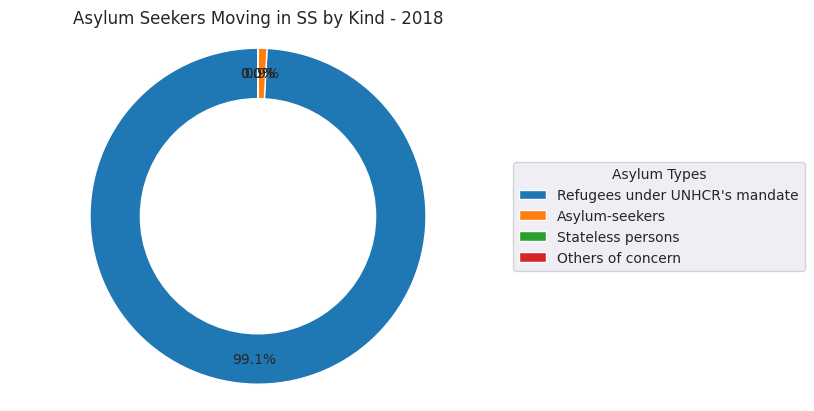

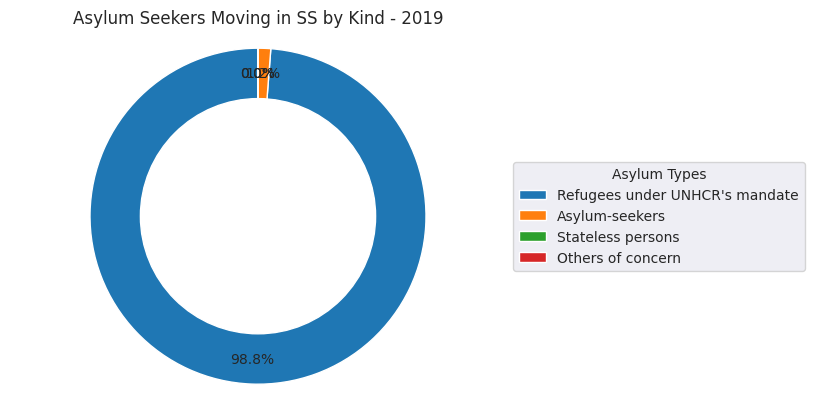

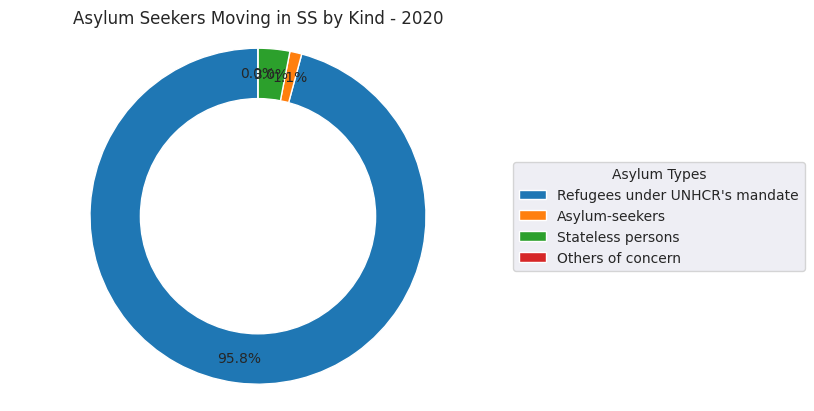

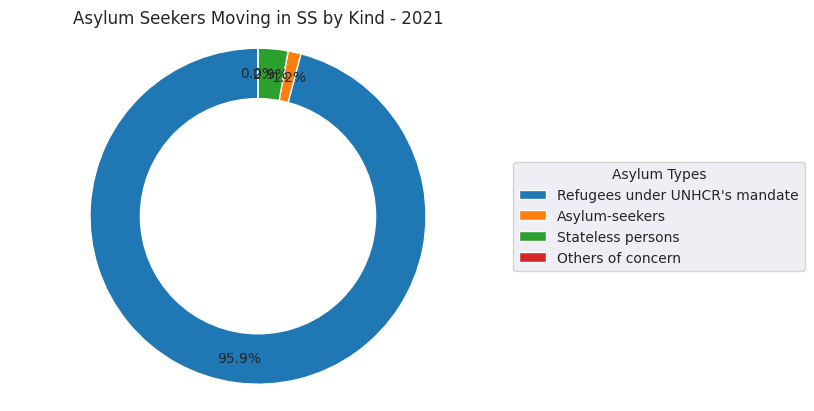

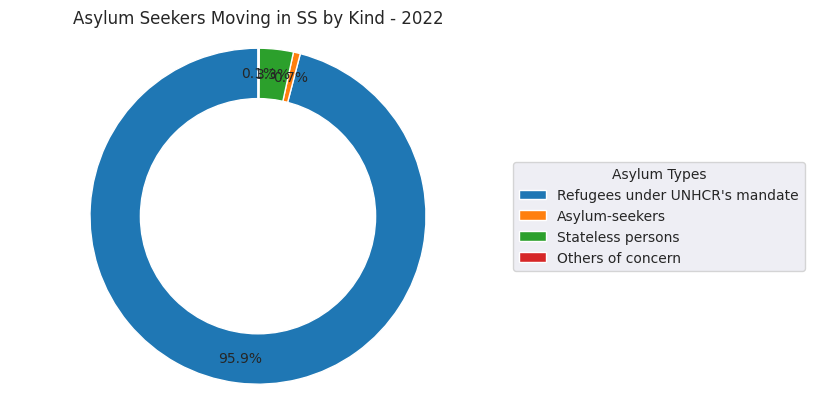

In [9]:
# Iterate through each year and create a donut chart
for year in df_grouped['Year']:
    year_data = df_grouped[df_grouped['Year'] == year].iloc[:, 1:-1]  # Exclude the "Total" column current year
    labels = year_data.columns
    sizes = year_data.values[0]

    # Create a donut chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), pctdistance=0.85)

    # Create a legend with labels
    ax.legend(wedges, labels, title="Asylum Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Draw a circle in the center to make it a donut chart
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(center_circle)

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Asylum Seekers Moving in SS by Kind - {year}')
    plt.show()

### Aggregating country wide data

In [10]:
ipc = pd.read_csv("data/generalised_ipc.csv")
ipc_country = ipc

ipc_country = ipc_country.drop(ipc_country.columns[0], axis=1)

# Filter for the years 2011 to 2020
years_to_include = list(range(2011, 2021))
ipc_country = ipc_country[ipc_country['year'].isin(years_to_include)]

# List of numeric columns
numeric_columns = [col for col in ipc_country.columns if pd.api.types.is_numeric_dtype(ipc_country[col])]

# Columns to remove
to_remove = ["year", "district_code", "centx", "centy", "month", "area", "pop", "cropland_pct", "date", "administrative_region", "quarters", "normalized_population", "weighted_ipc_pop", "pop_density", "weighted_ipc_density", "country"]

# Remove specified columns from numeric_columns
numeric_columns = [col for col in numeric_columns if col not in to_remove]

# Define a dictionary of aggregation functions
agg_funcs = {
    "ipc": "median",
    "ha": "sum",
    "count_violence": "sum",
    "sum_fatalities": "sum",
    "total_region_pop": "sum",
    "ndvi_mean": "median",
    "ndvi_anom": "median",
    "rain_mean": "median",
    "rain_anom": "median",
    "et_mean": "median",
    "et_anom": "median",
    "food_price_idx": "median",
    "ruggedness_mean": "median",
    "pasture_pct": "median",
    "generalized_ipc_pop": "median",
    "generalized_ipc_density": "median"
}

# Group and aggregate the columns
ipc_country = ipc_country.groupby(['year'])[numeric_columns].agg(agg_funcs).reset_index()

# Dropping columns "cropland_pct", "ruggedness_mean", "pasture_pct" bc they stay the same through the years
ipc_country = ipc_country.drop("pasture_pct", axis=1)

Calculating country population using total_region_pop

In [11]:
# Filtering relevant rows and columns from original ipc df
country_pop = ipc[["year", "total_region_pop"]]
years_to_include = list(range(2011, 2021))
country_pop = country_pop[country_pop['year'].isin(years_to_include)]

# Removing duplicated entries (since original df is per district)
duplicates = country_pop.duplicated(subset=['year', 'total_region_pop'], keep='first')

# Remove duplicate rows
country_pop = country_pop[~duplicates]

# Group and aggregate the columns
country_pop = country_pop.groupby('year').agg({"total_region_pop": "sum"}).reset_index()

In [12]:
# Adding country_pop column to ipc_country df
ipc_country = ipc_country.merge(country_pop, on=["year"])

# Changing name of column for better comprehension
ipc_country = ipc_country.rename({"total_region_pop_y": "country_pop"})

In [13]:
ipc_country.head()

year  ipc    ha  count_violence  sum_fatalities  total_region_pop_x  \
0  2011  1.0   0.0              47             850        1.105003e+09   
1  2012  2.0  18.0              63            2833        1.151821e+09   
2  2013  2.0  15.0             106             813        1.198641e+09   
3  2014  2.0  10.0             416            3708        1.245459e+09   
4  2015  2.0  31.0             265            1494        1.292278e+09   

   ndvi_mean   ndvi_anom  rain_mean  rain_anom    et_mean   et_anom  \
0   0.533569  100.557050  13.627400  -0.000542  14.935230  0.577368   
1   0.550520   99.078385  13.214850   0.177425  17.821395  1.373149   
2   0.563453  102.366050  11.316705  -0.036695  14.238310  0.279024   
3   0.600740  105.118400  16.154325   0.127691  17.858800  3.310333   
4   0.565841  103.703000  15.131285  -0.049978  13.247315  0.614845   

   food_price_idx  ruggedness_mean  generalized_ipc_pop  \
0        1.366350          15014.3             1.586476   
1        2.015065          15014.3             1.952897   
2        2.069135          15014.3             1.479096   
3        2.209709          15014.3             2.000000   
4        2.842725          15014.3             2.171017   

   generalized_ipc_density  total_region_pop_y  
0                 1.488962          10565486.0  
1                 1.680615          11023274.0  
2                 1.443426          11481064.0  
3                 2.000000          11938851.0  
4                 2.195056          12396639.0

### Correlation between refugees moving in SS and food crisis factors

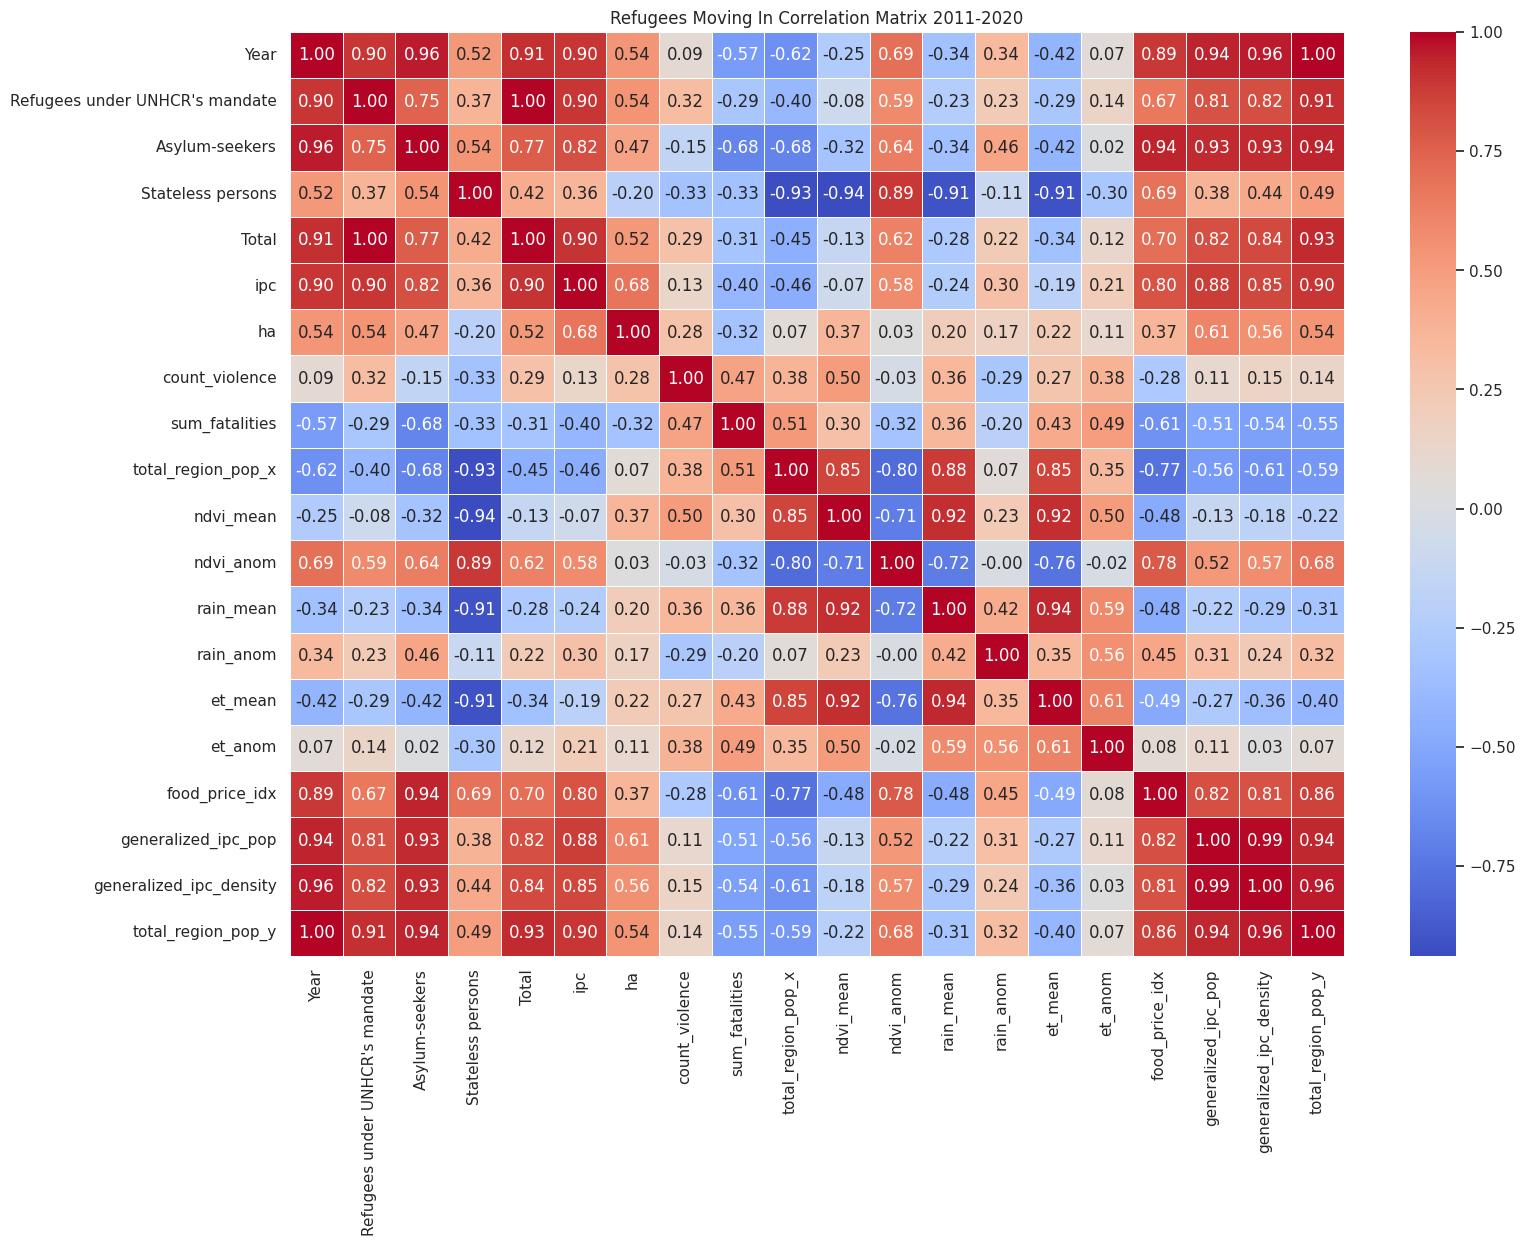

In [14]:
# renaming column and resetting index
ipc_country = ipc_country.rename(columns={"year": "Year"})
df_grouped.reset_index(inplace=True)

# Removing constant columns
df_grouped = df_grouped.drop("Others of concern", axis=1)
ipc_country = ipc_country.drop("ruggedness_mean", axis=1)

# Filter for the years 2011 to 2020
years_to_include = list(range(2011, 2021))
df_grouped = df_grouped[df_grouped['Year'].isin(years_to_include)]

merged_movein = pd.merge(df_grouped, ipc_country, on='Year')
merged_movein = merged_movein.drop("index", axis=1)

# Calculate the correlation matrix
movein_corr = merged_movein.corr()

sns.set(style="white")

# A function to plot the correlation matrix
def plot_correlation_matrix(corr_matrix, title):
    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(17, 12))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")
    plt.title(title)
    plt.show()

plot_correlation_matrix(movein_corr, "Refugees Moving In Correlation Matrix 2011-2020")

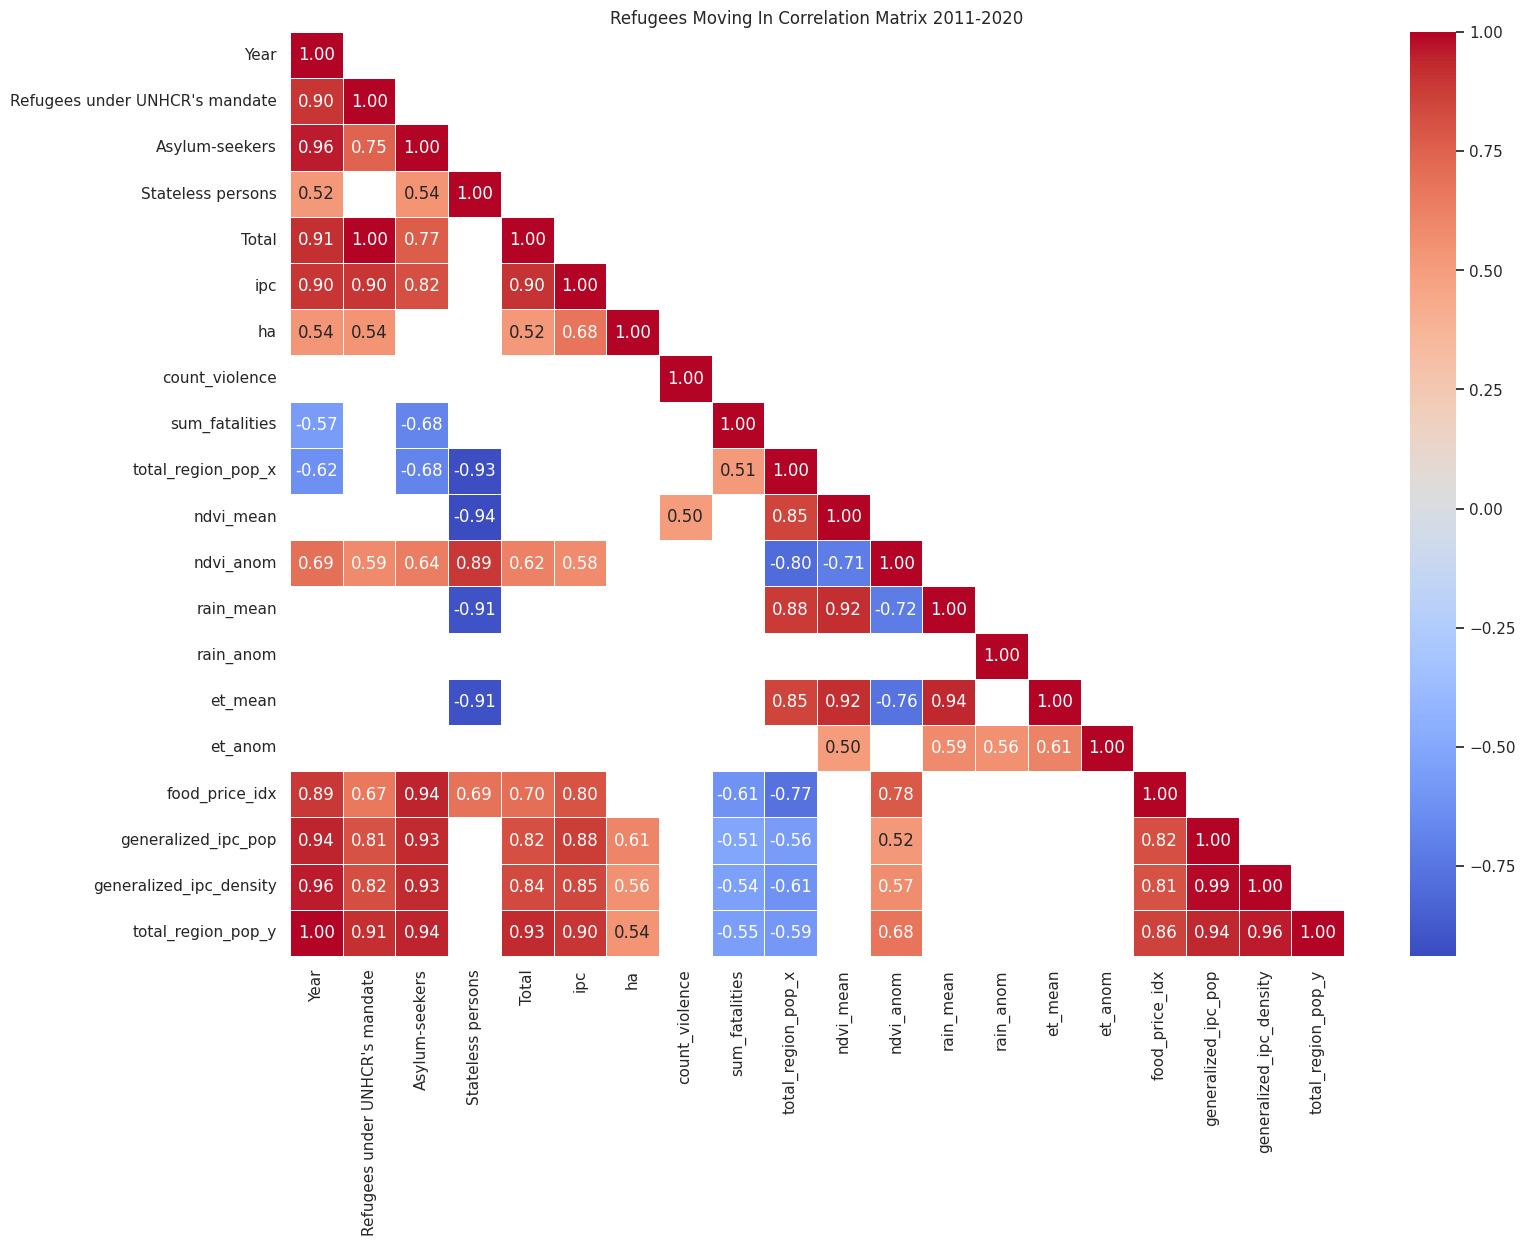

In [15]:
def plot_significant_correlations(corr_matrix, title, threshold=0.5):
    plt.figure(figsize=(17, 12))

    # Create a mask to only display significant correlations
    mask = np.triu(np.ones(corr_matrix.shape), k=1)
    corr_matrix = corr_matrix.where(np.abs(corr_matrix) >= threshold)

    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", mask=mask)
    plt.title(title)
    plt.show()

plot_significant_correlations(movein_corr, "Refugees Moving In Correlation Matrix 2011-2020", threshold=0.5)

## Moving out South Sudan

In [8]:
moving_out = pd.read_csv("data/moving_out.csv", on_bad_lines='skip')

# Removing Internal displacements
moving_out = moving_out.drop(moving_out[moving_out["Country of asylum (ISO)"] == "SSD"].index)

# Dropping redundant columns
moving_out = moving_out.drop(["Country of origin (ISO)", "Country of origin", "IDPs of concern to UNHCR", "Host Community", "Other people in need of international protection"], axis=1)

# Adding sum of all refugee like population
moving_out["Total"] = moving_out[["Refugees under UNHCR\'s mandate", "Asylum-seekers", "Stateless persons", "Others of concern"]].sum(axis=1)

moving_out.head()

Year Country of asylum Country of asylum (ISO)  \
0  2011           Germany                     DEU   
2  2012             Egypt                     EGY   
3  2012           Eritrea                     ERI   
4  2012          Ethiopia                     ETH   
5  2012           Germany                     DEU   

   Refugees under UNHCR's mandate  Asylum-seekers  Stateless persons  \
0                               0               5                  0   
2                             178             764                  0   
3                              25               0                  0   
4                           58715              21                  0   
5                               6              20                  0   

   Others of concern  Total  
0                  0      5  
2                  0    942  
3                  0     25  
4                  0  58736  
5                  0     26

In [9]:
moving_out["Country of asylum"].value_counts()

Country of asylum
Germany                     12
Kenya                       11
United States of America    11
Uganda                      11
Syrian Arab Rep.            11
                            ..
Burundi                      1
Cote d'Ivoire                1
Russian Federation           1
Hungary                      1
Lithuania                    1
Name: count, Length: 66, dtype: int64

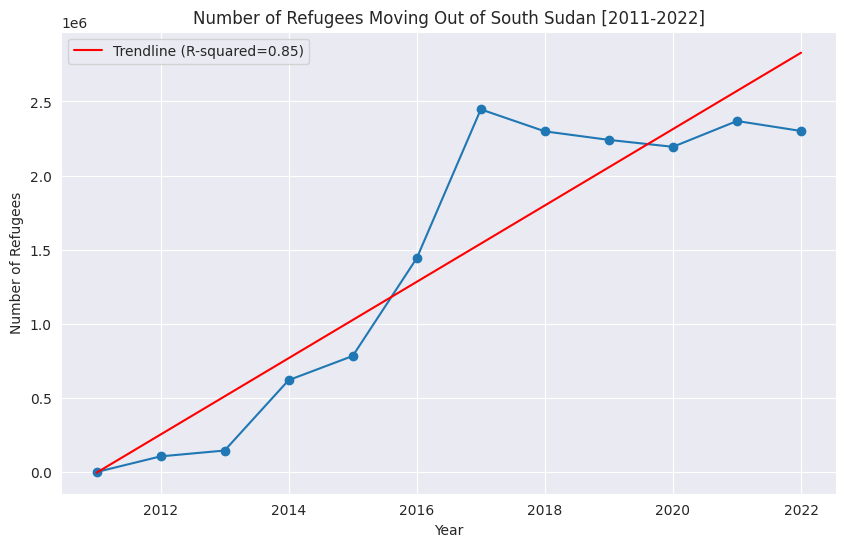

In [11]:
# Group and sum the data by year
df_grouped = moving_out.groupby('Year')[['Refugees under UNHCR\'s mandate', 'Asylum-seekers', 'Stateless persons', 'Others of concern', 'Total']].sum().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df_grouped['Year'], df_grouped['Total'], marker='o', linestyle='-')
plt.title('Number of Refugees Moving Out of South Sudan [2011-2022]')
plt.xlabel('Year')
plt.ylabel('Number of Refugees')
plt.grid(True)

# Fitting a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(df_grouped['Year'], df_grouped['Total'])

# Create a trendline using the regression model
trendline = intercept + slope * df_grouped['Year']

# Add the trendline to the chart as a red line
plt.plot(df_grouped['Year'], trendline, 'r', label=f'Trendline (R-squared={r_value**2:.2f})')

# Add a legend to the chart
plt.legend()

# Show the plot
plt.show()

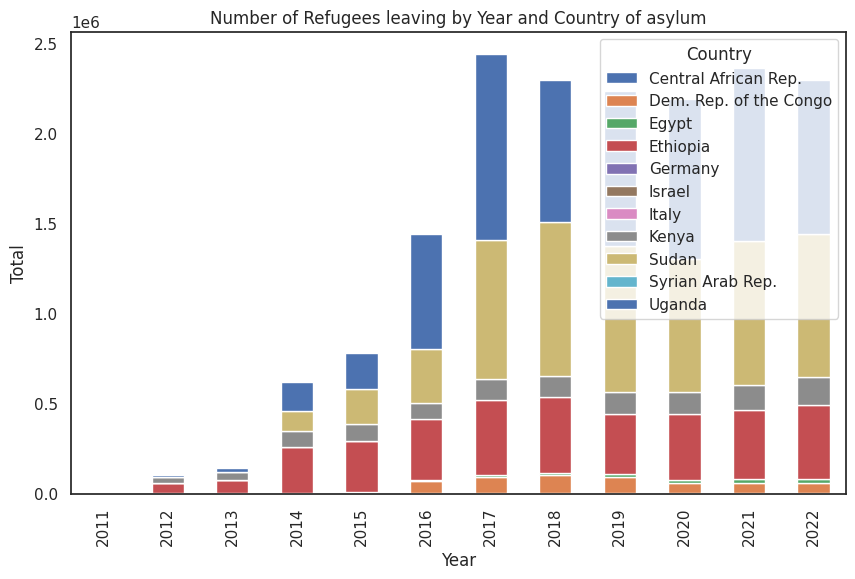

In [19]:
# Group and rank countries by year
moving_out['Rank'] = moving_out.groupby('Year')['Total'].rank(ascending=False)

# Filter for the top 3 countries
df_top3 = moving_out[moving_out['Rank'] <= 7]

# Pivot the data to create separate columns for each country
pivot_df = df_top3.pivot(index='Year', columns='Country of asylum', values='Total')

# Create the bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Number of Refugees leaving by Year and Country of asylum')
plt.legend(title='Country', loc='upper right')
plt.show()

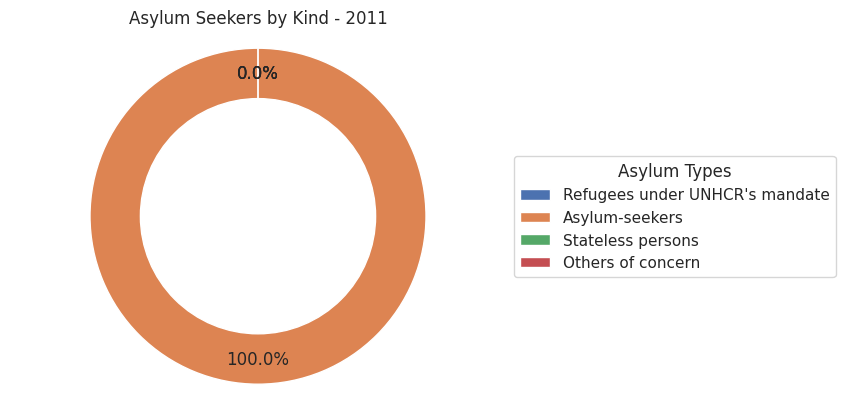

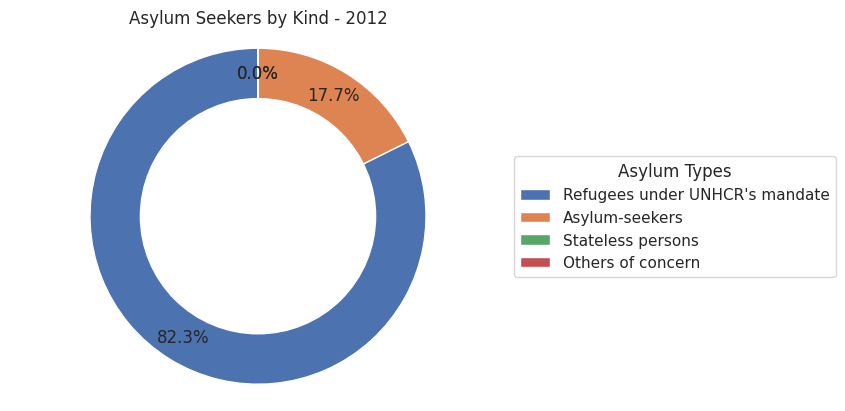

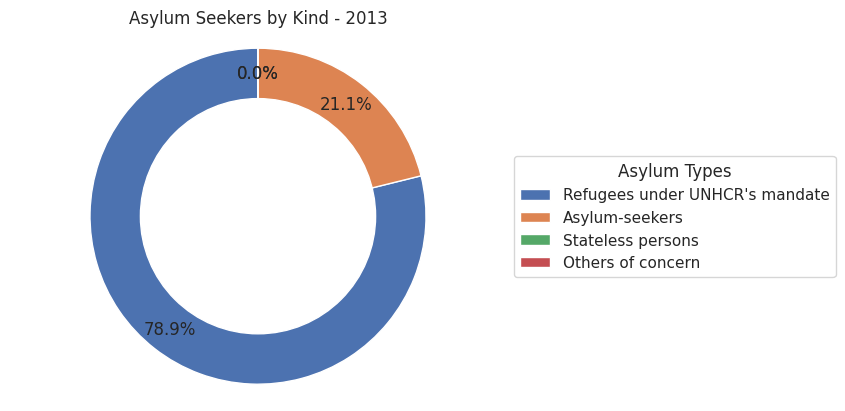

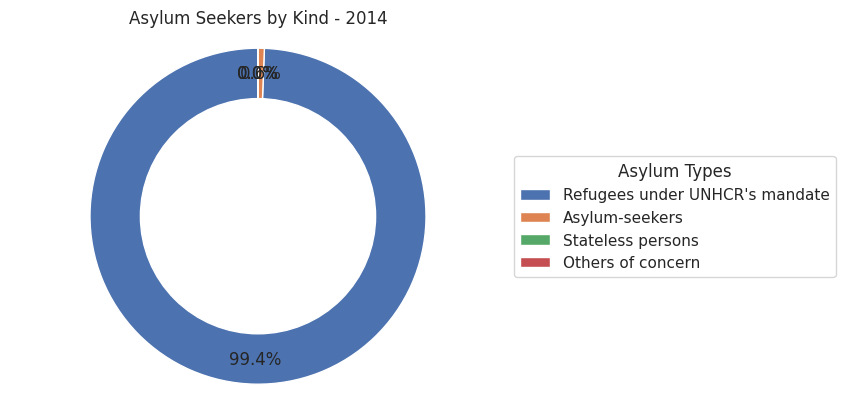

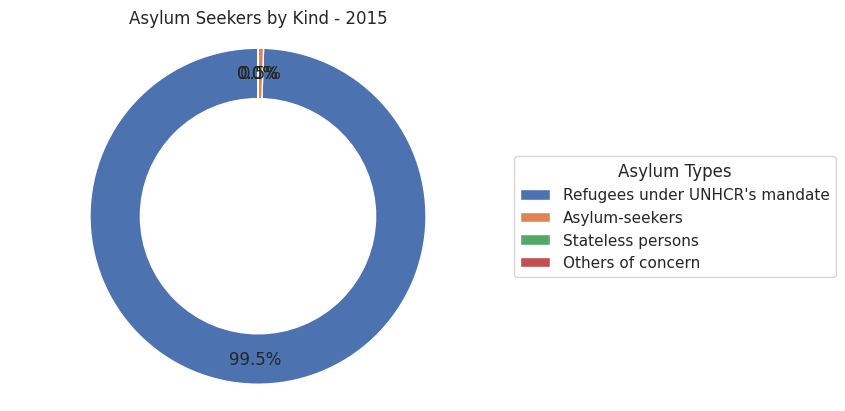

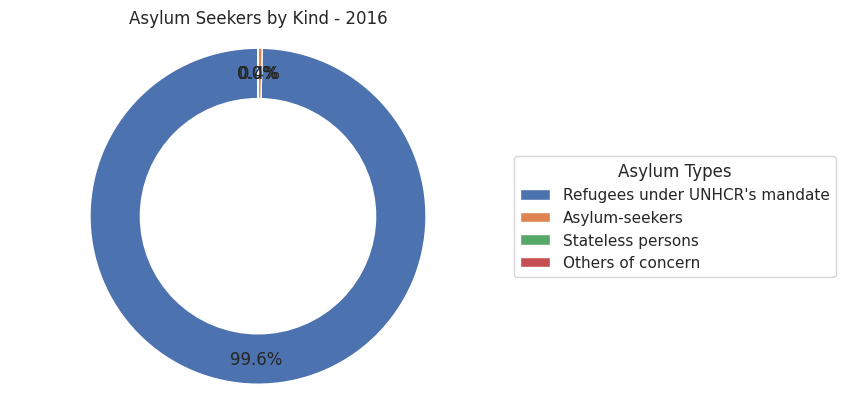

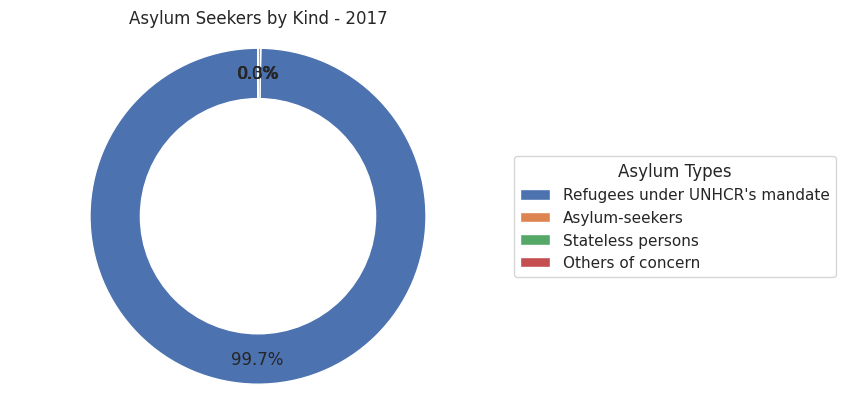

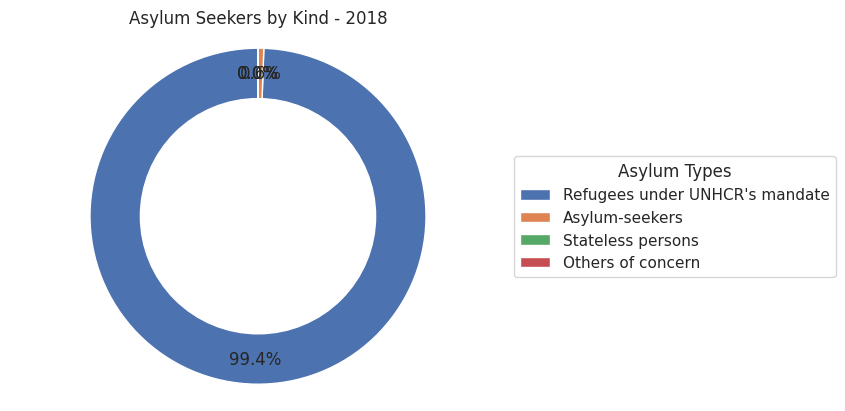

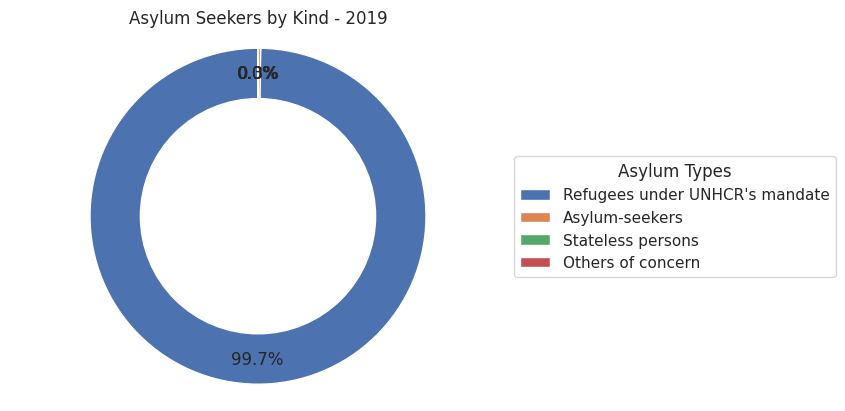

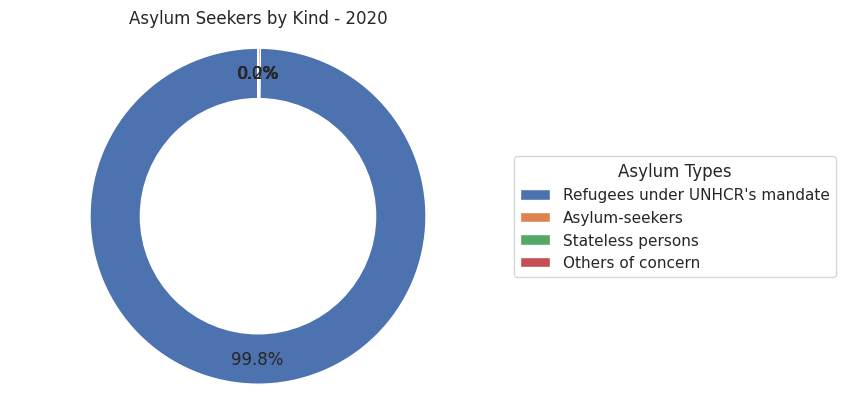

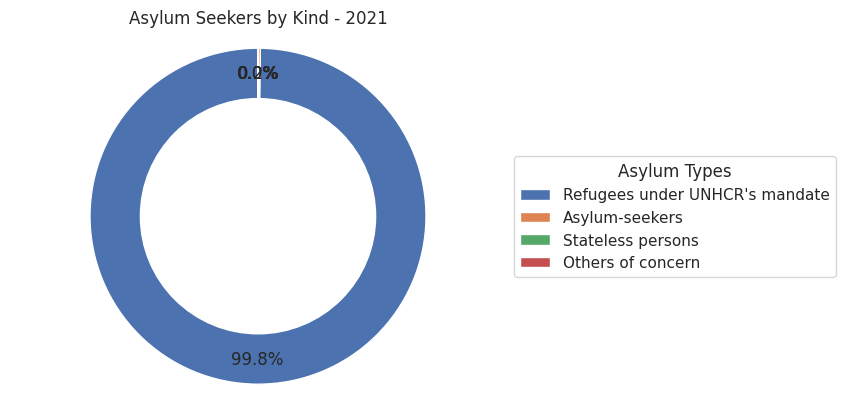

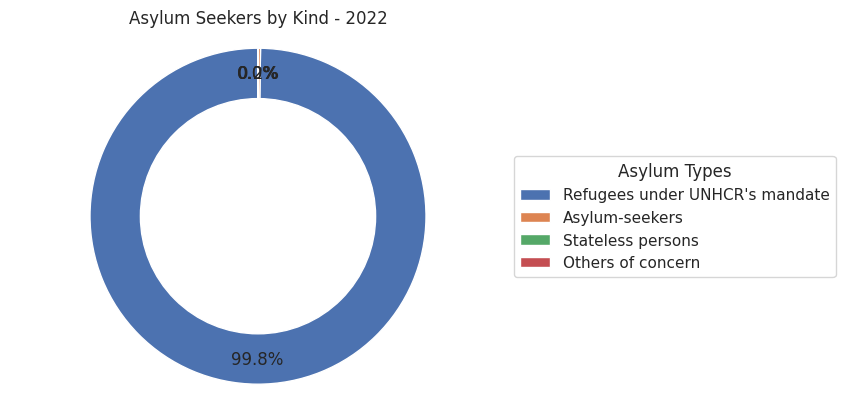

In [20]:
# Iterate through each year and create a donut chart
for year in df_grouped['Year']:
    year_data = df_grouped[df_grouped['Year'] == year].iloc[:, 1:-1]  # Exclude the "Total" column current year
    labels = year_data.columns
    sizes = year_data.values[0]

    # Create a donut chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), pctdistance=0.85)

    # Create a legend with labels
    ax.legend(wedges, labels, title="Asylum Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Draw a circle in the center to make it a donut chart
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(center_circle)

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Asylum Seekers by Kind - {year}')
    plt.show()

### Correlation of people moving out of SS with food crisis

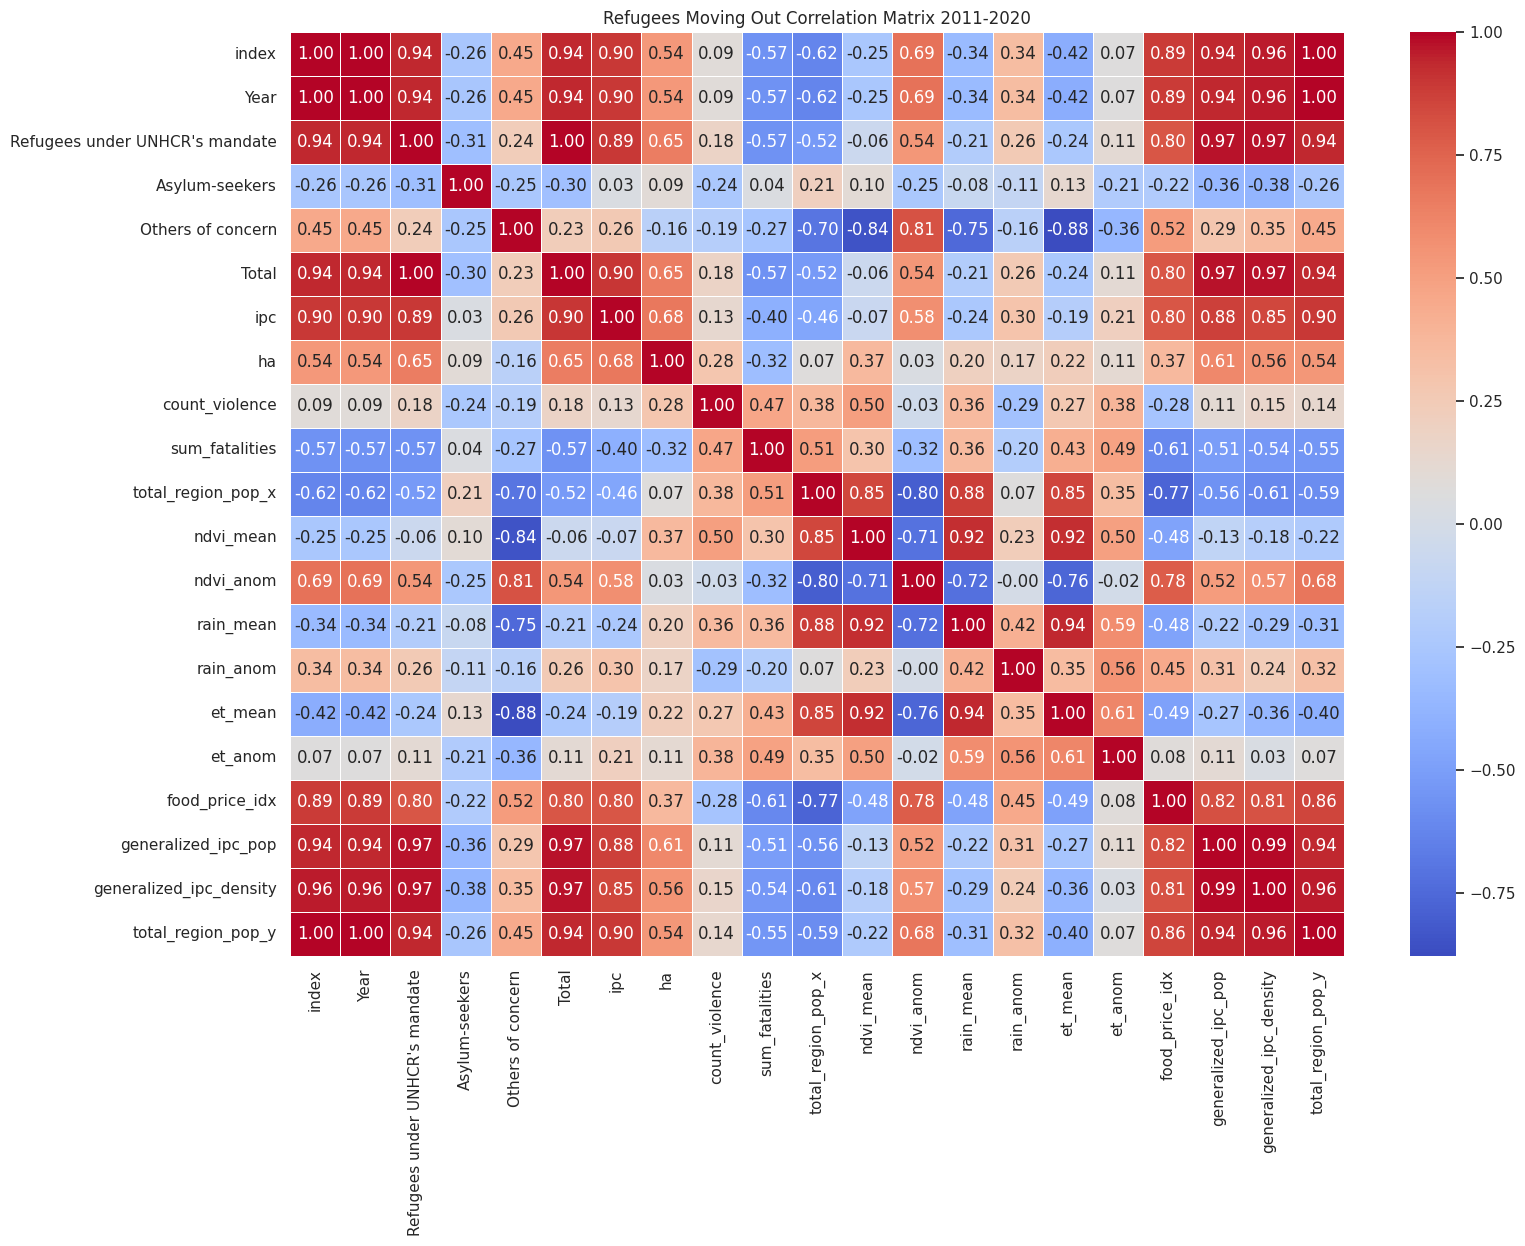

In [21]:
# renaming column and resetting index
ipc_country = ipc_country.rename(columns={"year": "Year"})
df_grouped.reset_index(inplace=True)

# Removing constant columns
df_grouped = df_grouped.drop("Stateless persons", axis=1)

# Filter for the years 2011 to 2020
years_to_include = list(range(2011, 2021))
df_grouped = df_grouped[df_grouped['Year'].isin(years_to_include)]

merged_moveout = pd.merge(df_grouped, ipc_country, on='Year')

# Calculate the correlation matrix
moveout_corr = merged_moveout.corr()

sns.set(style="white")

# # A function to plot the correlation matrix
def plot_correlation_matrix(corr_matrix, title):
    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(17, 12))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")
    plt.title(title)
    plt.show()

plot_correlation_matrix(moveout_corr, "Refugees Moving Out Correlation Matrix 2011-2020")

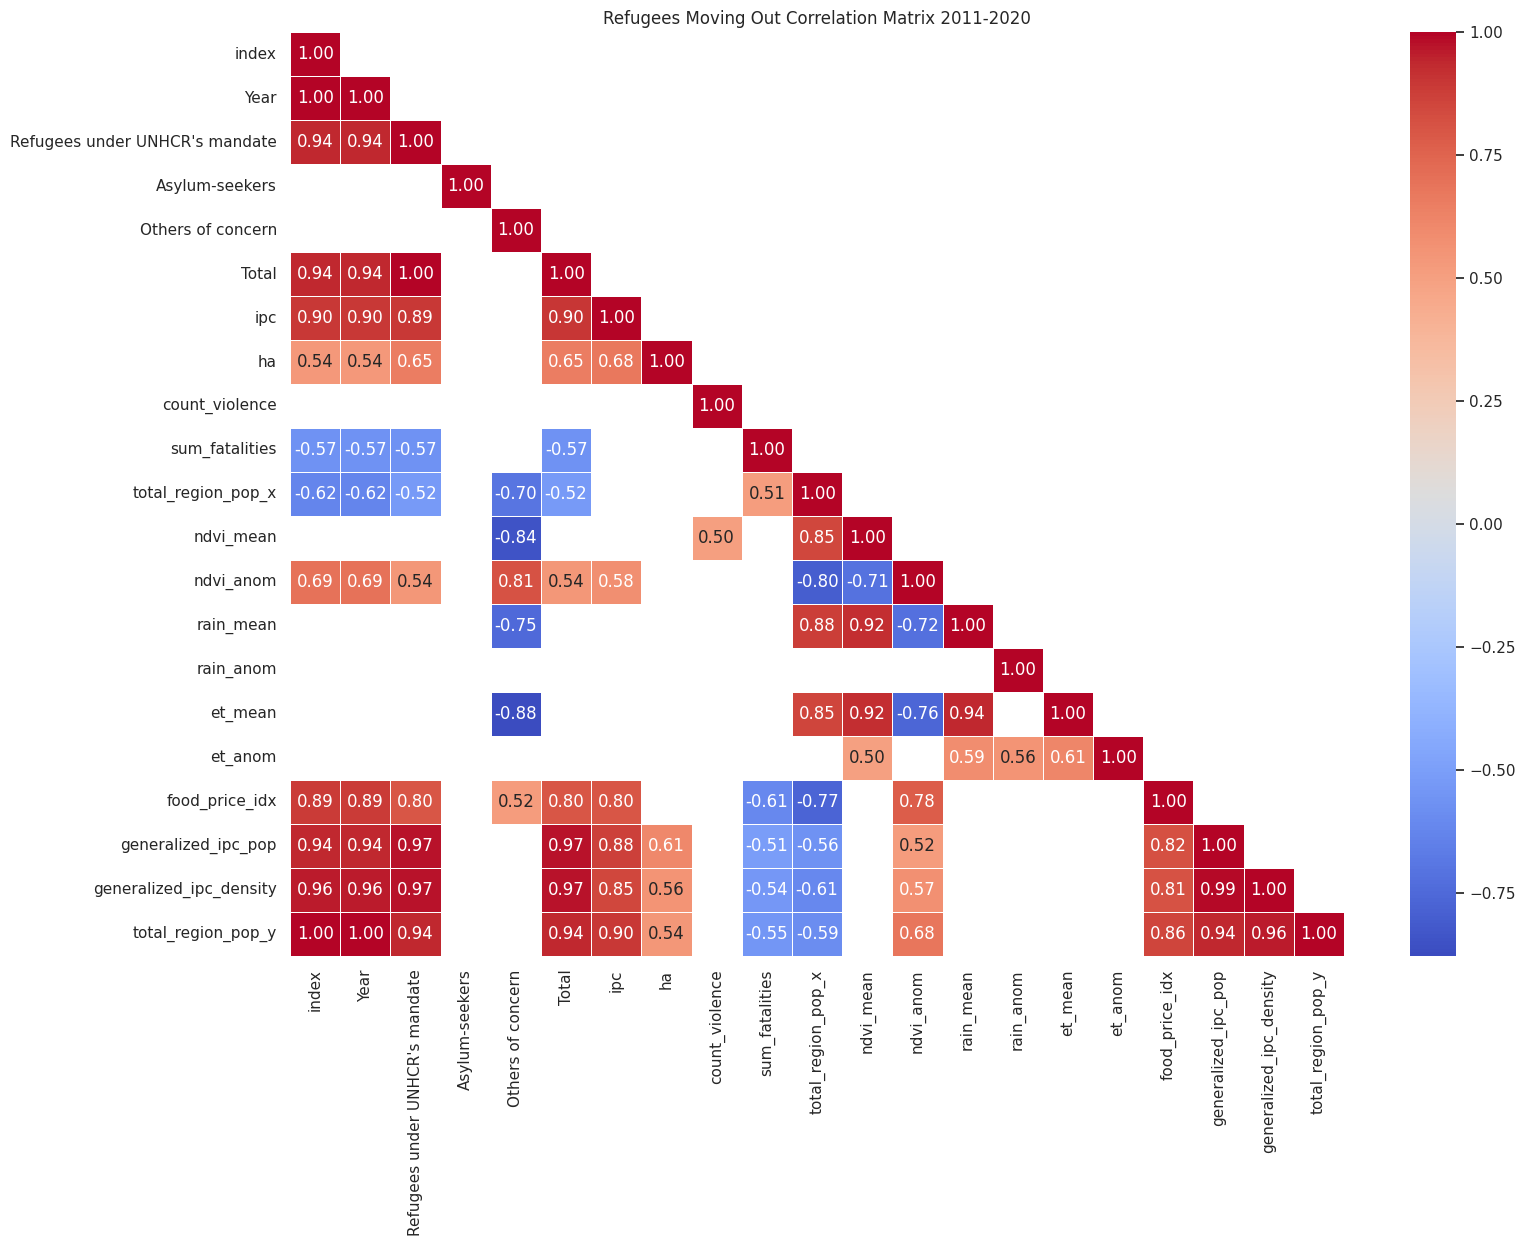

In [22]:
plot_significant_correlations(moveout_corr, "Refugees Moving Out Correlation Matrix 2011-2020", threshold=0.5)

## Internally displaced population (IDP)

In [12]:
# Run if you don't already have the internal_move.csv

# moving_out = pd.read_csv("data/moving_out.csv", on_bad_lines='skip')
# idp_df = moving_out[moving_out["Country of asylum (ISO)"] == "SSD"]
# idp_df.to_csv("data/internal_move.csv", index = False)

In [13]:
internal_df = pd.read_csv("data/internal_move.csv")

# Dropping redundant columns
internal_df = internal_df.drop(["Country of origin (ISO)", "Country of origin", "Country of asylum (ISO)", "Country of asylum", "Host Community", "Other people in need of international protection", "Refugees under UNHCR's mandate", "Asylum-seekers", "Stateless persons"], axis=1)

# Adding sum of all refugee like population
internal_df["Total"] = internal_df[["IDPs of concern to UNHCR", "Others of concern"]].sum(axis=1)

In [14]:
internal_df.head()

Year  IDPs of concern to UNHCR  Others of concern    Total
0  2011                    560161                  0   560161
1  2012                    345670                  0   345670
2  2013                    331097                  0   331097
3  2014                   1645392                  0  1645392
4  2015                   1790427                  0  1790427

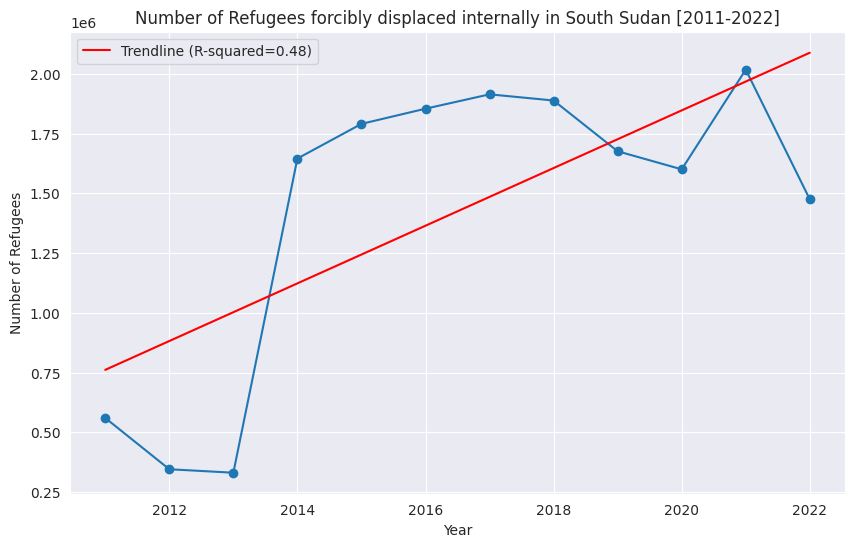

In [16]:
# Create a line chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(internal_df['Year'], internal_df['Total'], marker='o', linestyle='-')
plt.title('Number of Refugees forcibly displaced internally in South Sudan [2011-2022]')
plt.xlabel('Year')
plt.ylabel('Number of Refugees')
plt.grid(True)

# Fitting a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(internal_df['Year'], internal_df['Total'])

# Create a trendline using the regression model
trendline = intercept + slope * internal_df['Year']

# Add the trendline to the chart as a red line
plt.plot(internal_df['Year'], trendline, 'r', label=f'Trendline (R-squared={r_value**2:.2f})')

# Add a legend to the chart
plt.legend()

# Show the plot
plt.show()

# New data source for Internal Displacements

Data is collected in rounds and is collected every 6 months. Some rounds are missing

In [28]:
asylum = pd.read_csv("data/2015_2023_asylum.csv")
asylum.head()

state_name     region  year     idp  returnee   total
0  Central Equatoria  Equatoria  2015   26613     21232   47845
1  Central Equatoria  Equatoria  2016  108780      1321  110101
2  Central Equatoria  Equatoria  2017   21686     39306   60992
3  Central Equatoria  Equatoria  2018   31057     37471   68528
4  Central Equatoria  Equatoria  2019    7513      6512   14025

In [29]:
# Group by the 'region' column and sum the numeric columns
asylum = asylum.groupby(['region', 'year']).agg({
    'idp': 'sum', 'returnee': 'sum', 'total': 'sum'
}).reset_index()

asylum.head()

region  year     idp  returnee   total
0  Bahr El Ghazal  2015  105674     24223  129897
1  Bahr El Ghazal  2016   72681     34667  107348
2  Bahr El Ghazal  2017  151594     72410  224004
3  Bahr El Ghazal  2018  122461     74854  197315
4  Bahr El Ghazal  2019   19049     52751   71800

### Aggregating values to administrative regions

In [30]:
ipc_internal = ipc
ipc_internal = ipc_internal.drop(ipc_internal.columns[0], axis=1)

# Filter for the years 2015 to 2019
years_to_include = list(range(2015, 2020))
ipc_internal = ipc_internal[ipc_internal['year'].isin(years_to_include)]

# List of numeric columns
numeric_columns = [col for col in ipc_internal.columns if pd.api.types.is_numeric_dtype(ipc_internal[col])]

# Columns to remove
to_remove = ["year", "district_code", "centx", "centy", "year_month", "month", "area", "ipc", "pop", "normalized_population", "weighted_ipc_pop", "pop_density", "weighted_ipc_density"]

# Remove specified columns from numeric_columns
numeric_columns = [col for col in numeric_columns if col not in to_remove]

# Define a dictionary of aggregation functions
agg_funcs = {
    "ha": "sum",
    "count_violence": "sum",
    "sum_fatalities": "sum",
    "ndvi_mean": "median",
    "ndvi_anom": "median",
    "rain_mean": "median",
    "rain_anom": "median",
    "et_mean": "median",
    "et_anom": "median",
    "food_price_idx": "median",
    "cropland_pct": "median",
    "ruggedness_mean": "median",
    "pasture_pct": "median",
    "total_region_pop": "median",
    "generalized_ipc_pop": "median",
    "generalized_ipc_density": "median",
}

# Group and aggregate the columns
result = ipc_internal.groupby(['administrative_region', 'year'])[numeric_columns].agg(agg_funcs).reset_index()

# Change column name to later merge
result = result.rename(columns = {"administrative_region": "region"})

# Dropping columns "cropland_pct", "ruggedness_mean", "pasture_pct" bc they stay the same through the years
result = result.drop(["cropland_pct", "ruggedness_mean", "pasture_pct"], axis=1)

In [31]:
result.head()

region  year    ha  count_violence  sum_fatalities  ndvi_mean  \
0  Bahr El Ghazal  2015   1.0              65             439   0.543481   
1  Bahr El Ghazal  2016   6.0              52             172   0.532602   
2  Bahr El Ghazal  2017   9.0              44             159   0.582081   
3  Bahr El Ghazal  2018  23.0              88             294   0.573009   
4  Bahr El Ghazal  2019  12.0              19              71   0.599860   

    ndvi_anom  rain_mean  rain_anom    et_mean   et_anom  food_price_idx  \
0  103.000300  13.311625  -0.005814  10.625935  0.363305        3.072672   
1   98.653825  12.415205  -0.003216  10.864320 -0.096672        8.309710   
2  103.656100  11.262440  -1.757922  14.346090  1.310745       31.592725   
3  102.705200  12.048460   0.027469  14.734960  1.304138       45.389400   
4  102.737800  12.725685   0.363146  18.602500  3.210733       69.751840   

   total_region_pop  generalized_ipc_pop  generalized_ipc_density  
0         3079776.0             2.077271                 2.093805  
1         3451016.0             2.479470                 2.359491  
2         3822256.0             2.957717                 2.934711  
3         4193492.0             3.027408                 3.002200  
4         4564735.0             3.268389                 3.245119

In [32]:
# Merge the two dataframes on 'year' and 'region'
merged_df = asylum.merge(result, on=["region", "year"])
merged_df.head()

region  year     idp  returnee   total    ha  count_violence  \
0  Bahr El Ghazal  2015  105674     24223  129897   1.0              65   
1  Bahr El Ghazal  2016   72681     34667  107348   6.0              52   
2  Bahr El Ghazal  2017  151594     72410  224004   9.0              44   
3  Bahr El Ghazal  2018  122461     74854  197315  23.0              88   
4  Bahr El Ghazal  2019   19049     52751   71800  12.0              19   

   sum_fatalities  ndvi_mean   ndvi_anom  rain_mean  rain_anom    et_mean  \
0             439   0.543481  103.000300  13.311625  -0.005814  10.625935   
1             172   0.532602   98.653825  12.415205  -0.003216  10.864320   
2             159   0.582081  103.656100  11.262440  -1.757922  14.346090   
3             294   0.573009  102.705200  12.048460   0.027469  14.734960   
4              71   0.599860  102.737800  12.725685   0.363146  18.602500   

    et_anom  food_price_idx  total_region_pop  generalized_ipc_pop  \
0  0.363305        3.072672         3079776.0             2.077271   
1 -0.096672        8.309710         3451016.0             2.479470   
2  1.310745       31.592725         3822256.0             2.957717   
3  1.304138       45.389400         4193492.0             3.027408   
4  3.210733       69.751840         4564735.0             3.268389   

   generalized_ipc_density  
0                 2.093805  
1                 2.359491  
2                 2.934711  
3                 3.002200  
4                 3.245119

In [33]:
# Group the dataframe by region
grouped = merged_df.groupby('region')

corr_matrices = {}

# Iterate through groups and calculate correlations
for name, group in grouped:
    # Select numeric columns only
    numeric_group = group.select_dtypes(include='number')

    # Calculate the correlation matrix
    corr_matrix = numeric_group.corr()

    # Store the correlation matrix in the dictionary
    corr_matrices[name] = corr_matrix

# Correlation matrices for each region
bahr_corr = corr_matrices["Bahr El Ghazal"]
equa_corr = corr_matrices["Equatoria"]
nile_corr = corr_matrices["Greater Upper Nile"]

### Plotting

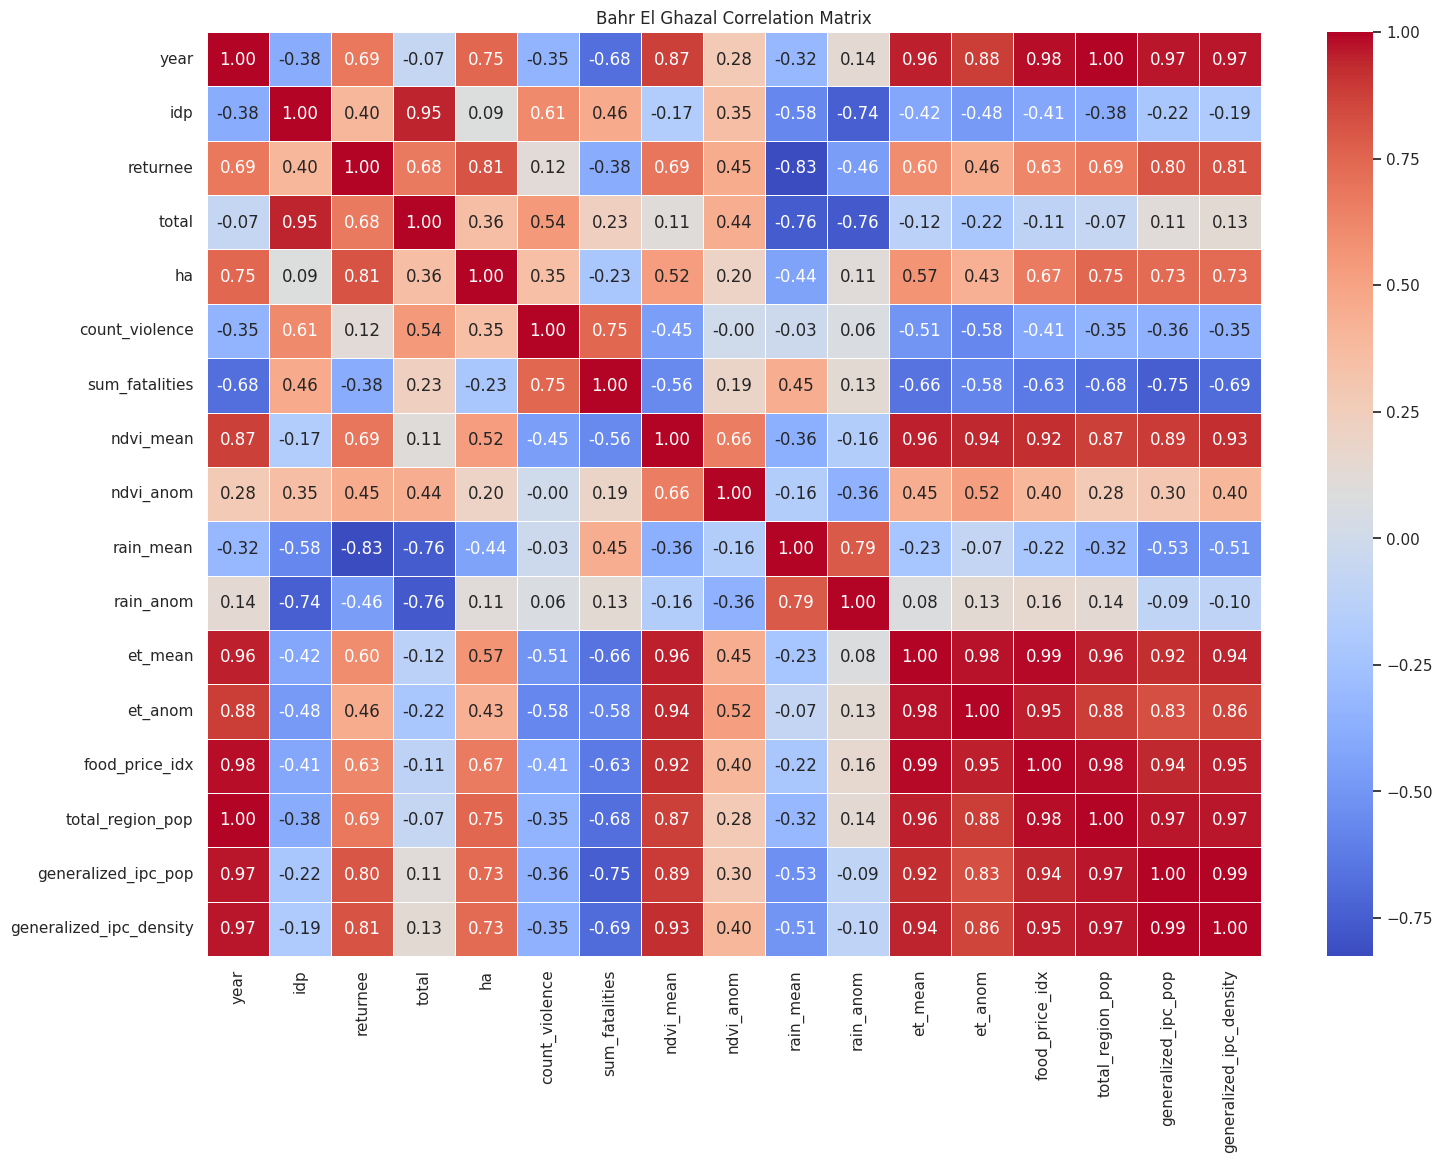

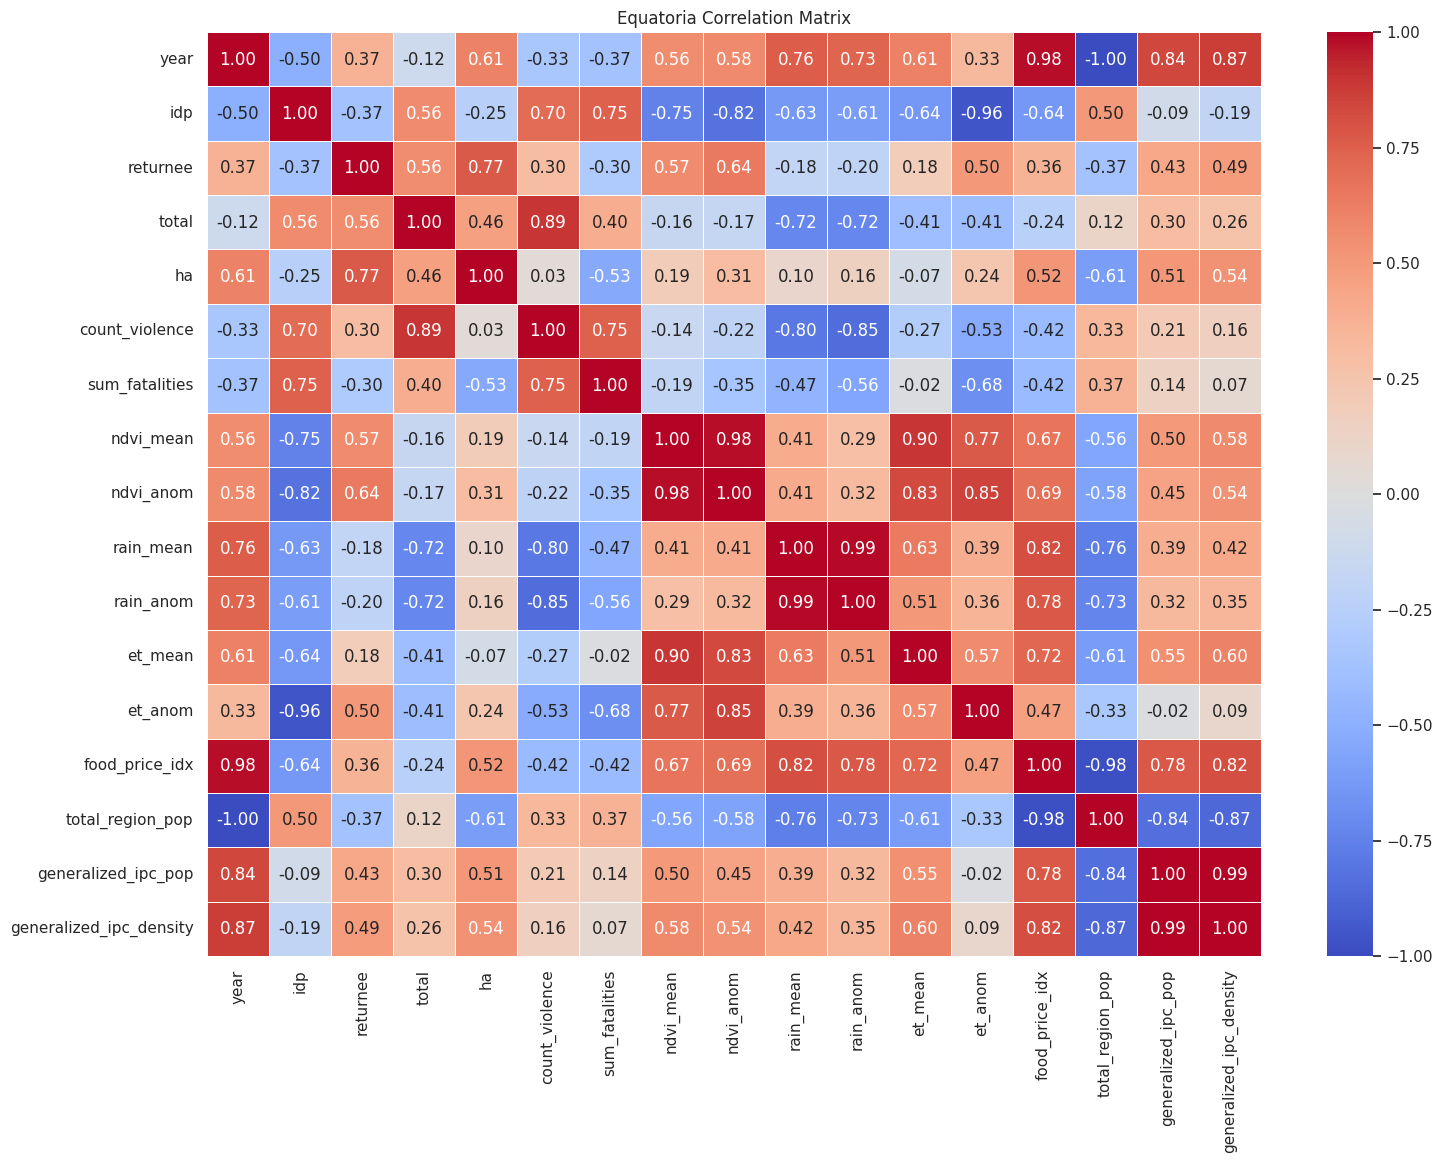

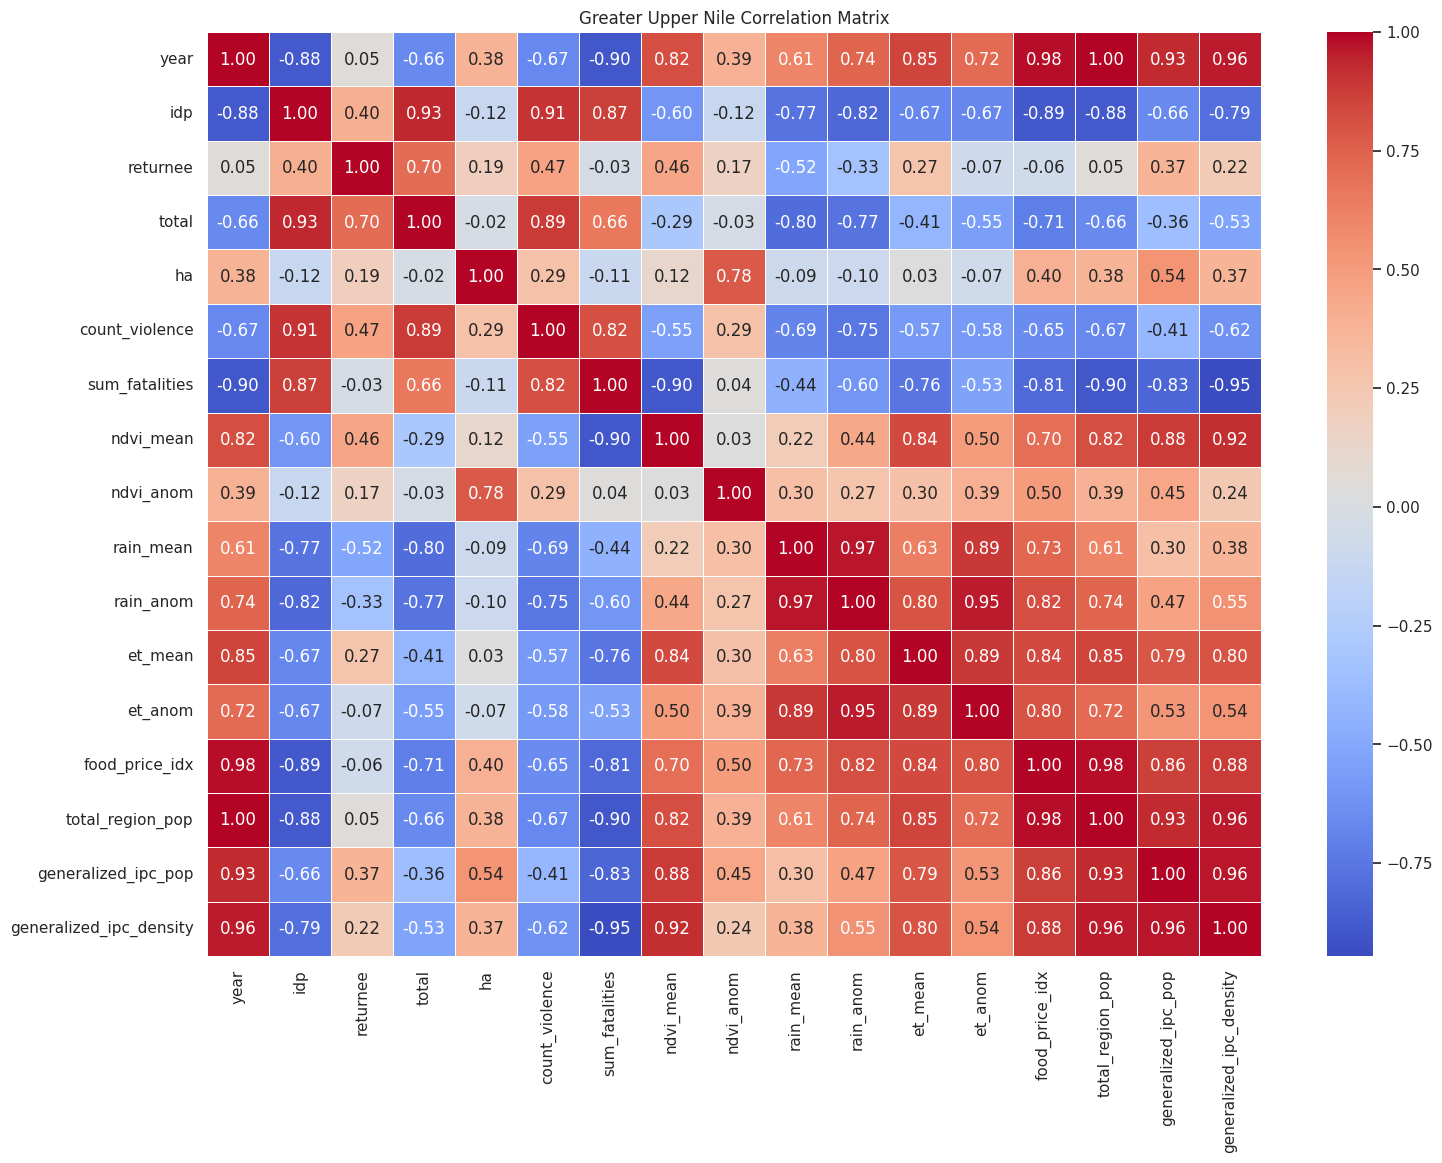

In [34]:
# Plot the correlation matrices for each region
plot_correlation_matrix(bahr_corr, "Bahr El Ghazal Correlation Matrix")
plot_correlation_matrix(equa_corr, "Equatoria Correlation Matrix")
plot_correlation_matrix(nile_corr, "Greater Upper Nile Correlation Matrix")

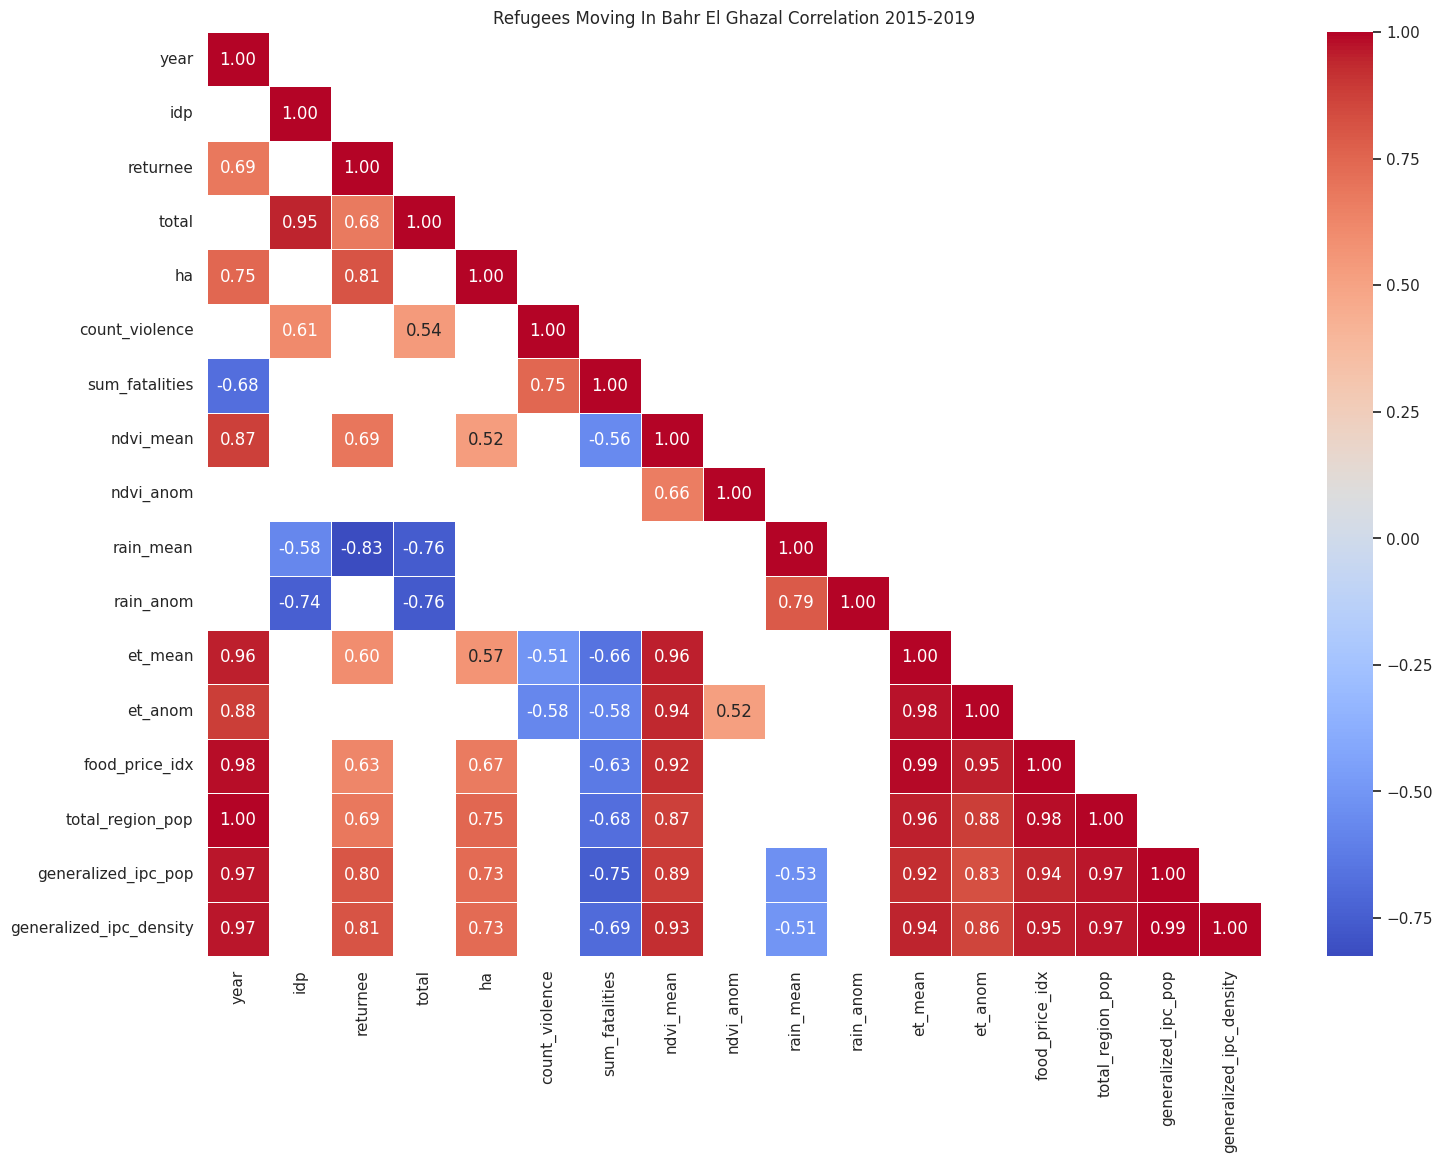

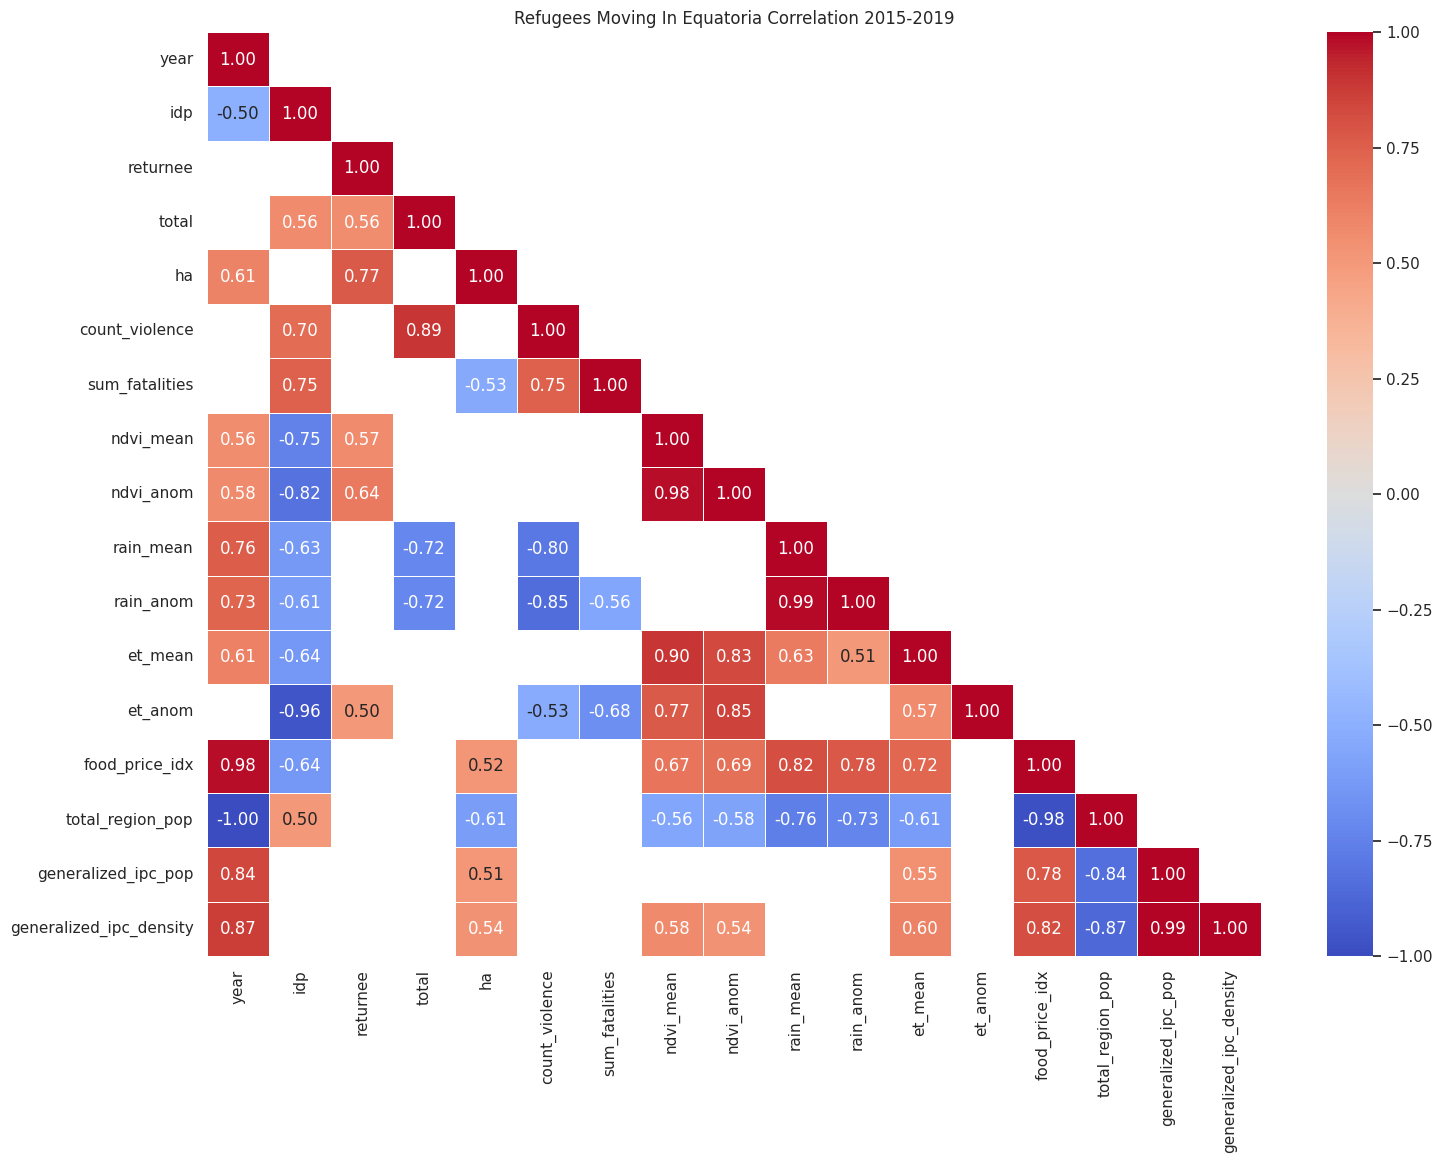

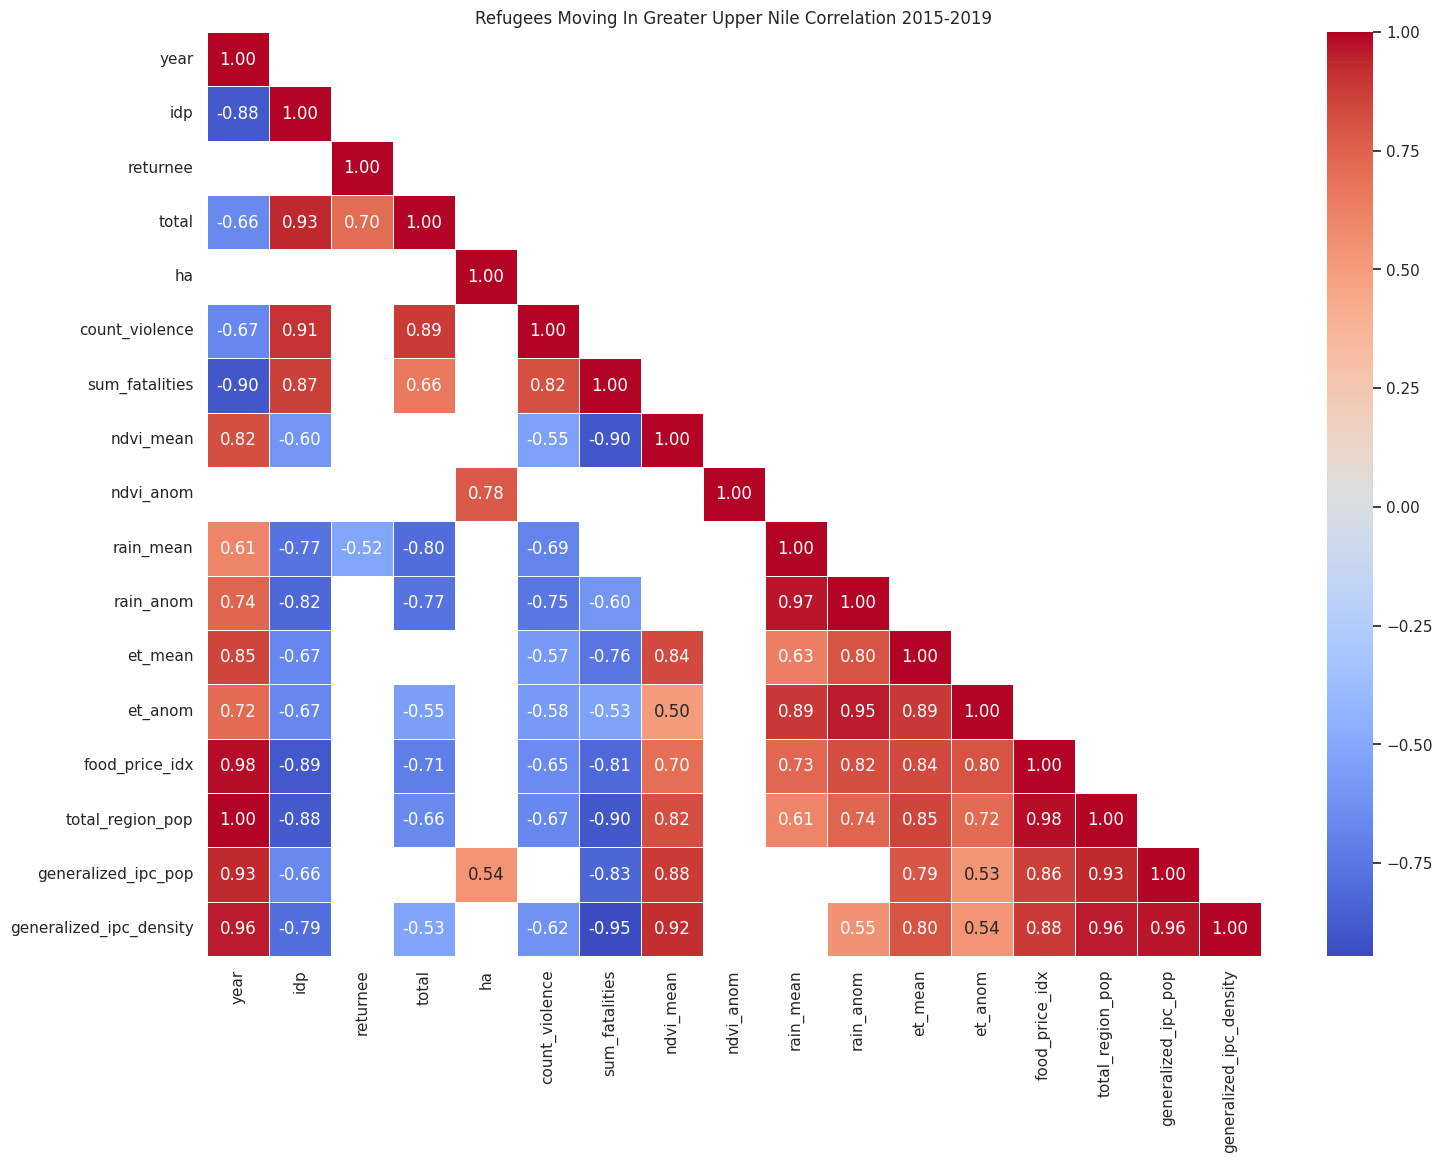

In [35]:
# Plot the relevant correlation matrices for each region
plot_significant_correlations(bahr_corr, "Refugees Moving In Bahr El Ghazal Correlation 2015-2019", threshold=0.5)
plot_significant_correlations(equa_corr, "Refugees Moving In Equatoria Correlation 2015-2019", threshold=0.5)
plot_significant_correlations(nile_corr, "Refugees Moving In Greater Upper Nile Correlation 2015-2019", threshold=0.5)